In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set display option to view full columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple pages
pd.set_option('display.max_colwidth', None)  # Show full column width
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/CAPSTONE/Train_Dataset.csv')

In [ ]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [ ]:
print(f' Number of Columns :',df.shape[1])
print(f' Number of Rows :',df.shape[0])
df.info()

 Number of Columns : 40
 Number of Rows : 121856
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status  

In [ ]:
# The dataset contains 121,856 rows and 40 columns, with a mix of numerical and categorical data, and some columns with missing values.

In [ ]:
df.shape

(121856, 40)

## STEP 1: DATA PRE-PROCESSING

In [ ]:
null_values=(df.isnull().sum()/df.shape[0])*100

round(null_values.sort_values(ascending=False),2)

,0
Own_House_Age,65.73
Score_Source_1,56.49
Social_Circle_Default,50.82
Client_Occupation,34.00
Score_Source_3,22.09
Credit_Bureau,15.21
ID_Days,4.90
Score_Source_2,4.67
Population_Region_Relative,3.99
Loan_Annuity,3.95


In [ ]:
DUPES = df.duplicated().sum()
print(f'Number of duplicate rows: {DUPES}')

Number of duplicate rows: 0


In [ ]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        unique_count = df[col].nunique()
        print(f"Column '{col}' has {unique_count} unique categories.")


Column 'Client_Income' has 1516 unique categories.
Column 'Credit_Amount' has 6816 unique categories.
Column 'Loan_Annuity' has 16680 unique categories.
Column 'Accompany_Client' has 7 unique categories.
Column 'Client_Income_Type' has 8 unique categories.
Column 'Client_Education' has 5 unique categories.
Column 'Client_Marital_Status' has 4 unique categories.
Column 'Client_Gender' has 3 unique categories.
Column 'Loan_Contract_Type' has 2 unique categories.
Column 'Client_Housing_Type' has 6 unique categories.
Column 'Population_Region_Relative' has 164 unique categories.
Column 'Age_Days' has 22583 unique categories.
Column 'Employed_Days' has 13220 unique categories.
Column 'Registration_Days' has 19254 unique categories.
Column 'ID_Days' has 9655 unique categories.
Column 'Client_Occupation' has 18 unique categories.
Column 'Client_Permanent_Match_Tag' has 2 unique categories.
Column 'Client_Contact_Work_Tag' has 2 unique categories.
Column 'Type_Organization' has 58 unique categ

In [ ]:
df.head(1)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0


#### Converting incorrect columns dtypes to correct dtypes

In [ ]:
# Convert object columns to numeric, errors='coerce' will replace non-numeric values with NaN
correct_columns = ['Client_Income','Credit_Amount','Loan_Annuity','Population_Region_Relative','Age_Days','Employed_Days','Registration_Days',
                   'ID_Days','Score_Source_3']
for cols in correct_columns:
    df[cols] = pd.to_numeric(df[cols], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [ ]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [ ]:
df.head(1)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0


Since ID column is redundent column, we an create it as our index column

In [ ]:
df.set_index('ID', inplace=True)
df.head(1)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0


In [ ]:
df['Default'].astype(object)

,Default
ID,
12142509,0
12138936,0
12181264,0
12188929,0
12133385,0
...,...
12207714,1
12173765,0
12103937,0


#### Seperating Numeric and Category columns

In [ ]:
object_df = df[['Car_Owned','Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type','Mobile_Tag', 'Homephone_Tag',	'Workphone_Working',
       'Client_Occupation', 'Cleint_City_Rating', 'Application_Process_Day', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization','Default']]

object_cols = object_df.columns.tolist()  # Get a list of columns from object_df
numeric_df = df[[col for col in df.columns if col not in object_cols]]  # Select columns not in object_cols

In [ ]:
object_df.head(1)

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Cleint_City_Rating,Application_Process_Day,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Default
ID,,,,,,,,,,,,,,,,,,,,,
12142509,0.0,0.0,1.0,0.0,Alone,Commercial,Secondary,M,Male,CL,Home,1,1,0,Sales,2.0,6.0,Yes,Yes,Self-employed,0


In [ ]:
numeric_df.head(1)

,Client_Income,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Client_Family_Members,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
ID,,,,,,,,,,,,,,,,,,
12142509,6750.0,0.0,61190.55,3416.85,0.028663,13957.0,1062.0,6123.0,383.0,NaN,2.0,17.0,0.568066,0.478787,NaN,0.0186,63.0,NaN


##### Value counts of categorical columns


In [ ]:
df['Car_Owned'].value_counts()

,count
Car_Owned,
0.0,77724
1.0,40551


In [ ]:
df['Bike_Owned'].value_counts()

,count
Bike_Owned,
0.0,78948
1.0,39284


In [ ]:
df['Active_Loan'].value_counts()

,count
Active_Loan,
0.0,59208
1.0,59013


In [ ]:
df['House_Own'].value_counts()

,count
House_Own,
1.0,81798
0.0,36397


In [ ]:
df['Accompany_Client'].value_counts()

,count
Accompany_Client,
Alone,97409
Relative,15748
Partner,4516
Kids,1334
Others,987
Group,104
##,12


In [ ]:
df['Client_Income_Type'].value_counts()

,count
Client_Income_Type,
Service,61028
Commercial,27764
Retired,21043
Govt Job,8303
Student,8
Unemployed,6
Maternity leave,2
Businessman,1


In [ ]:
df['Client_Education'].value_counts() ## Object and Encoding

,count
Client_Education,
Secondary,83911
Graduation,28819
Graduation dropout,3960
Junior secondary,1455
Post Grad,66


In [ ]:
df['Client_Marital_Status'].value_counts()

,count
Client_Marital_Status,
M,87349
S,17404
D,7556
W,6074


In [ ]:
df['Client_Gender'].value_counts()

,count
Client_Gender,
Male,78463
Female,40977
XNA,3


In [ ]:
df['Loan_Contract_Type'].value_counts()

,count
Loan_Contract_Type,
CL,107118
RL,11087


In [ ]:
df['Client_Housing_Type'].value_counts()

,count
Client_Housing_Type,
Home,104870
Family,5783
Municipal,4248
Rental,1816
Office,1002
Shared,450


In [ ]:
df['Mobile_Tag'].value_counts()

,count
Mobile_Tag,
1,121855
0,1


In [ ]:
df['Homephone_Tag'].value_counts()

,count
Homephone_Tag,
0,97424
1,24432


In [ ]:
df['Workphone_Working'].value_counts()

,count
Workphone_Working,
0,87590
1,34266


In [ ]:
df['Client_Occupation'].value_counts()

,count
Client_Occupation,
Laborers,21024
Sales,12136
Core,10611
Managers,8099
Drivers,7150
High skill tech,4317
Accountants,3766
Medicine,3172
Security,2683


In [ ]:
df['Cleint_City_Rating'].value_counts()

,count
Cleint_City_Rating,
2.0,88949
3.0,17043
1.0,13455


In [ ]:
df['Application_Process_Day'].value_counts()

,count
Application_Process_Day,
2.0,20907
3.0,20116
1.0,19712
4.0,19668
5.0,19613
6.0,13125
0.0,6287


In [ ]:
df['Client_Permanent_Match_Tag'].value_counts()

,count
Client_Permanent_Match_Tag,
Yes,112454
No,9402


In [ ]:
df['Client_Contact_Work_Tag'].value_counts()

,count
Client_Contact_Work_Tag,
Yes,100015
No,21841


In [ ]:
df['Type_Organization'].value_counts()

,count
Type_Organization,
Business Entity Type 3,26279
XNA,21085
Self-employed,14725
Other,6290
Medicine,4320
Business Entity Type 2,4126
Government,3971
School,3371
Trade: type 7,2979


In [ ]:
df['Default'].value_counts()

,count
Default,
0,112011
1,9845


#### Finding unique values present in categorical columns

In [ ]:
for col in object_df.columns:
    unique_values = df[col].unique()
    print(f"\nUnique values in '{col}':", unique_values)


Unique values in 'Car_Owned': [ 0.  1. nan]

Unique values in 'Bike_Owned': [ 0.  1. nan]

Unique values in 'Active_Loan': [ 1.  0. nan]

Unique values in 'House_Own': [ 0. nan  1.]

Unique values in 'Accompany_Client': ['Alone' 'Relative' 'Others' 'Kids' nan 'Partner' '##' 'Group']

Unique values in 'Client_Income_Type': ['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']

Unique values in 'Client_Education': ['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad']

Unique values in 'Client_Marital_Status': ['M' 'W' 'S' nan 'D']

Unique values in 'Client_Gender': ['Male' 'Female' nan 'XNA']

Unique values in 'Loan_Contract_Type': ['CL' 'RL' nan]

Unique values in 'Client_Housing_Type': ['Home' 'Family' 'Office' 'Municipal' nan 'Rental' 'Shared']

Unique values in 'Mobile_Tag': [1 0]

Unique values in 'Homephone_Tag': [1 0]

Unique values in 'Workphone_Working': [0 1]

Unique values in 'Client_Occupation'

#### Descriptive Stats of Numeric type columns

In [ ]:
numeric_description = numeric_df.describe().T
print("\nDescription of numeric columns:\n")
numeric_description



Description of numeric columns:



,count,mean,std,min,25%,50%,75%,max
Client_Income,118234.0,16865.191737,11538.154494,2565.000000,11250.000000,14400.000000,20250.000000,1.800009e+06
Child_Count,118218.0,0.417779,0.728802,0.000000,0.000000,0.000000,1.000000,1.900000e+01
Credit_Amount,118219.0,60046.488951,40350.663346,4500.000000,27000.000000,51750.000000,80865.000000,4.050000e+05
Loan_Annuity,117030.0,2721.254492,1461.466162,217.350000,1657.350000,2499.750000,3466.800000,2.250000e+04
Population_Region_Relative,116988.0,0.022602,0.413617,0.000533,0.010006,0.018850,0.028663,1.000000e+02
Age_Days,118239.0,16027.422948,4366.356504,7676.000000,12398.000000,15734.000000,19661.000000,2.520100e+04
Employed_Days,118190.0,67154.070615,138971.782951,0.000000,932.000000,2212.000000,5634.000000,3.652430e+05
Registration_Days,118225.0,4975.162123,3514.546963,0.000000,2008.000000,4493.000000,7464.000000,2.373800e+04
ID_Days,115871.0,2987.471015,1511.884576,0.000000,1705.000000,3242.000000,4295.000000,7.197000e+03
Own_House_Age,41761.0,12.157324,12.056079,0.000000,5.000000,9.000000,15.000000,6.900000e+01


Since we came accross the % of nulls present into the dataset w.r.t columns the following columns are decided to drop with threshold of 50% and above :
* **Own House Age**
* **Score scource 1**
* **Social Circle Default**

In [ ]:
df_new=df.drop(['Own_House_Age','Social_Circle_Default','Score_Source_1'],axis=1)
df_new.head(1)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,NaN,0


#### Imputing the missing values

In [ ]:
# Impute missing values in numeric columns with their median
for col in numeric_df.columns:
    # Check if the column exists in df_new before imputing
    if col in df_new.columns:
        df_new[col].fillna(df_new[col].median(), inplace=True)
print("\nDataFrame after imputing numeric columns with median:\n")
df_new.head(1)


DataFrame after imputing numeric columns with median:



,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.478787,0.53707,63.0,1.0,0


In [ ]:
# Impute missing values in category or object dtype columns with the most frequent value (mode)
for col in object_df.columns:
    if col in df_new.columns:  # Check if column was retained after dropping
        df_new[col].fillna(df_new[col].mode()[0], inplace=True)
print("\nDataFrame after imputing object columns with mode:\n")
df_new.head(1)


DataFrame after imputing object columns with mode:



,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.478787,0.53707,63.0,1.0,0


In [ ]:
df_new.isnull().sum().sum()

0

#### Finding Outliers

In [ ]:
# Find outliers in numeric columns using boxplot

#tag = 1

#plt.figure(figsize=(10, 20))

# Calculate the number of subplots needed
#num_subplots = sum(1 for i in numeric_df.columns if i in df_new.columns)

# Adjust the subplot grid if needed
#num_rows = (num_subplots + 1) // 2  # Calculate rows, ensuring enough space
#num_cols = 2  # Keep 2 columns

#for i in numeric_df.columns:
 #   if i in df_new.columns:
  #      plt.subplot(num_rows, num_cols, tag)  # Use calculated grid dimensions
   #     sns.boxplot(data=df_new, x=i, orient='h')
    #    plt.title(f'Skewness of {i}: {round(df_new[i].skew(), 3)}')
     #   tag += 1

#plt.tight_layout()
#plt.show()

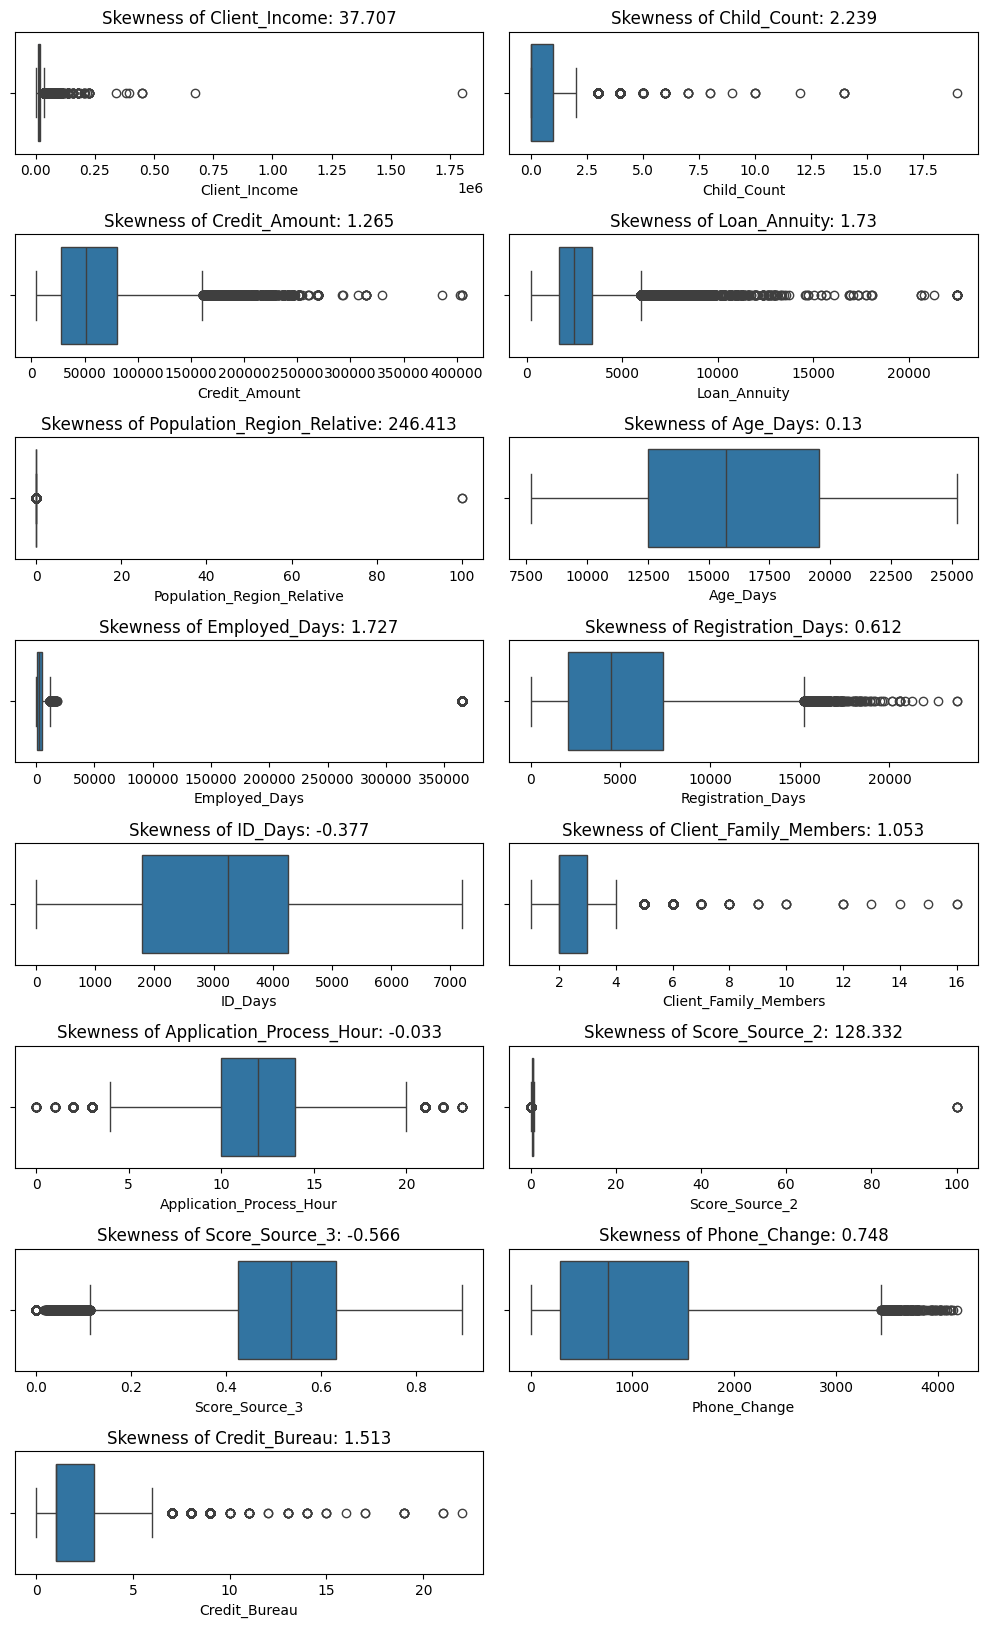

In [ ]:
t=1
plt.figure(figsize = [10,20])

for i in numeric_df.columns:
  if i in df_new.columns:
    plt.subplot(10,2,t)
    sns.boxplot(data=df_new, x=i)
    plt.title(f'Skewness of {i}: {round(df_new[i].skew(),3)}')
    t+=1
plt.tight_layout()
plt.show()

INFERENCES FROM BOXPLOT:

1.	Client_Income: Extremely high positive skew (37.707), indicating most clients have low income, with a few high-income outliers.
2.	Child_Count: Moderate positive skew (2.239), showing most clients have few children, with some high outliers.
3.	Credit_Amount: Moderate positive skew (1.265), with higher loan amounts as outliers.
4.	Loan_Annuity: Moderate positive skew (1.73), indicating most clients have low to moderate annuity amounts, with some high-value outliers.
5.  Population_Region_Relative: Extremely high positive skewness (246.413), indicating clients are living in less populated area.
6.	Age_Days: Nearly symmetric (0.13), showing an even age distribution with minimal skew.
7.  Employed_Days: Moderate positive skewness (1.727), showing mostly employed days are less than 50000 with an extreme outlier at greater than 350000.
8.  Registration_Days: Nearly symmetric distribution (0.612), indicating outliers above 15000.
9.  ID_Days: Slight negative skew (-0.377) with lower outliers, indicating clients with long-standing IDs.
10. Client_Family_Members: Moderate positive skew (1.053) with outliers, representing clients with larger family sizes.
11. Application_Process_Hour: Nearly symmetric (-0.033), with a few outliers at unusual application times.
12. Score_Source_2: Extremely high positive skew (128.332), suggesting concentration of low scores with high-value outliers, potentially needing transformation.
13. Score_Source_3: Slight negative skew (-0.566) with some low-value outliers.
14.	Phone_Change: Moderate positive skew (0.748), with outliers at the high end, possibly indicating clients frequently changing phone numbers.
15.	Credit_Bureau: Moderate positive skew (1.513) with higher outliers, potentially indicating high credit activity.


These observations highlight possible outliers in income, child count, loan amount, and annuity.

**Treating Outliers**


In [ ]:
# Capping

for i in numeric_df:
    # Calculate Q1, Q3, and IQR
    q3, q1 = np.percentile(df[i], [75, 25])
    iqr = q3 - q1

    # Define upper and lower limits for outliers
    ul, ll = q3 + 1.5 * iqr, q1 - 1.5 * iqr

    # Replace outliers with the upper or lower limit
    df[i] = df[i].apply(lambda x: ul if x > ul else ll if x < ll else x)

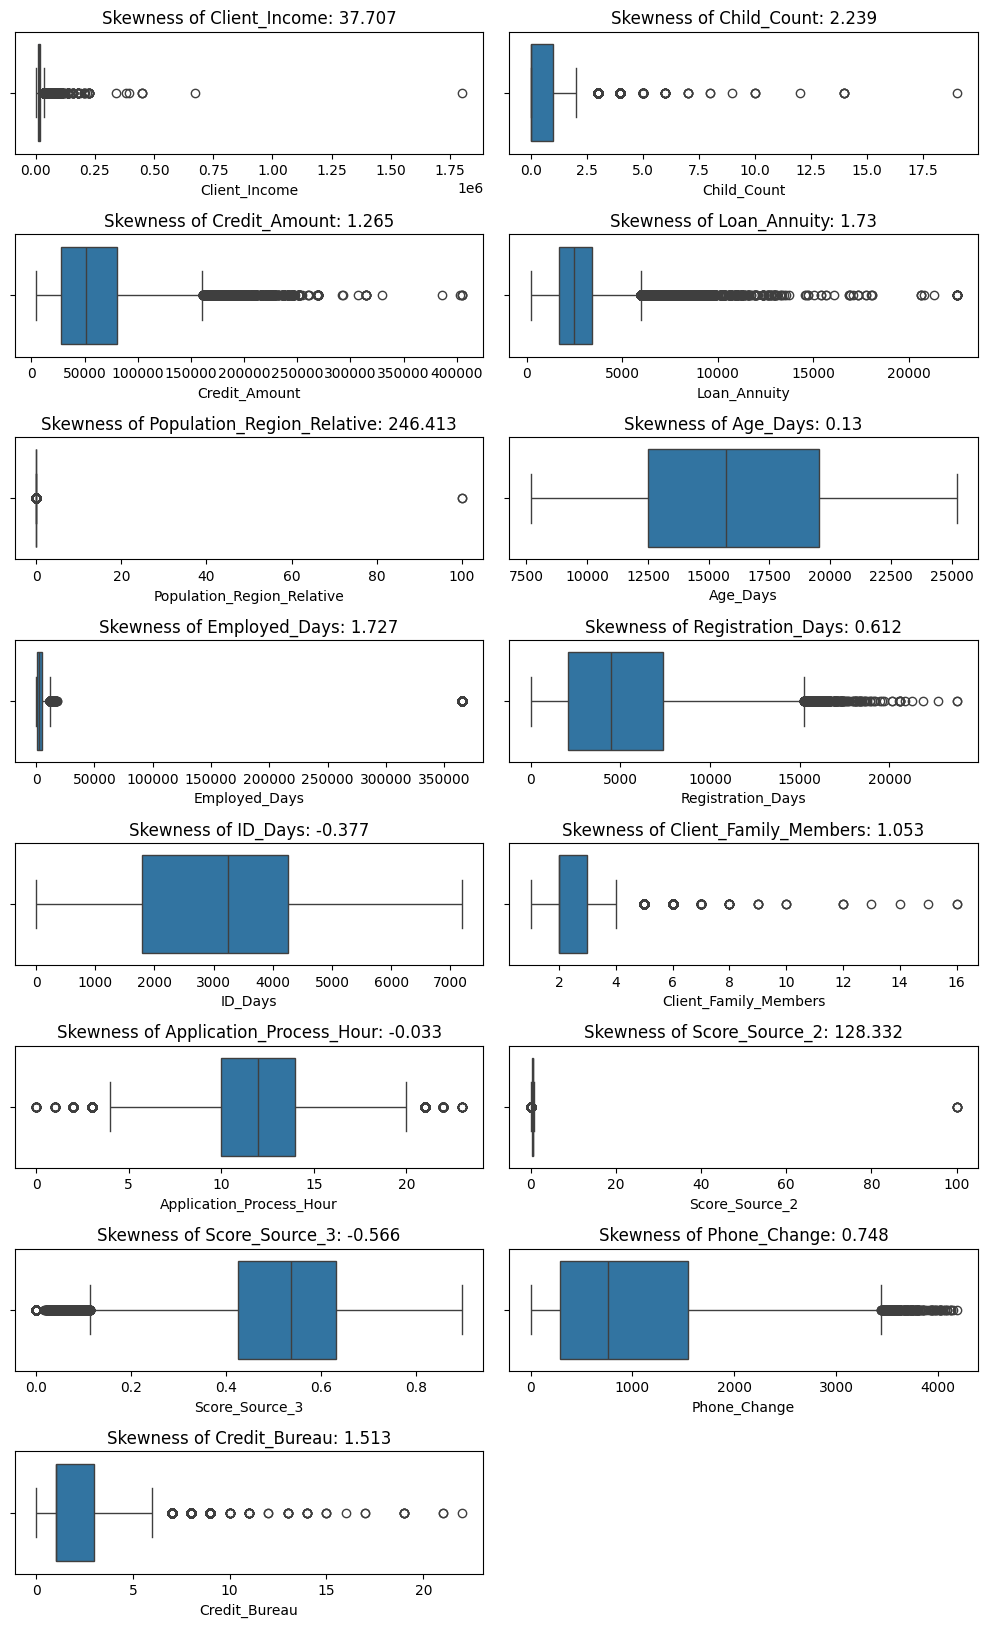

In [ ]:
t=1
plt.figure(figsize = [10,20])

for i in numeric_df.columns:
  if i in df_new.columns:
    plt.subplot(10,2,t)
    sns.boxplot(data=df_new, x=i)
    plt.title(f'Skewness of {i}: {round(df_new[i].skew(),3)}')
    t+=1
plt.tight_layout()
plt.show()

##STEP 2: VISUALIZATION

### Univariate Analysis

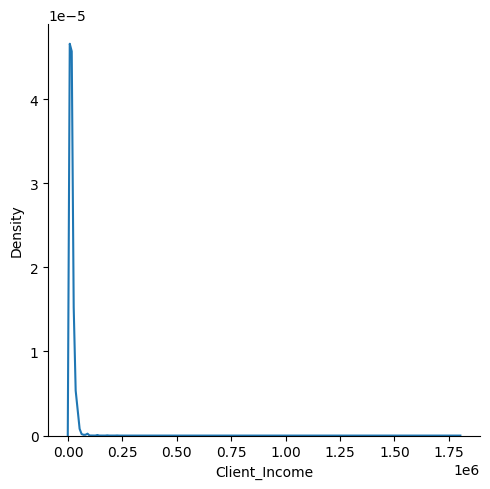

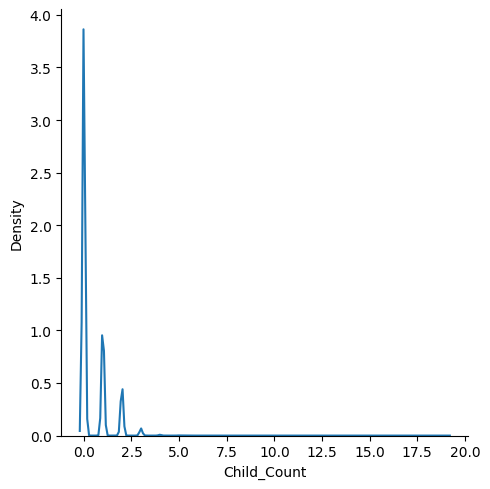

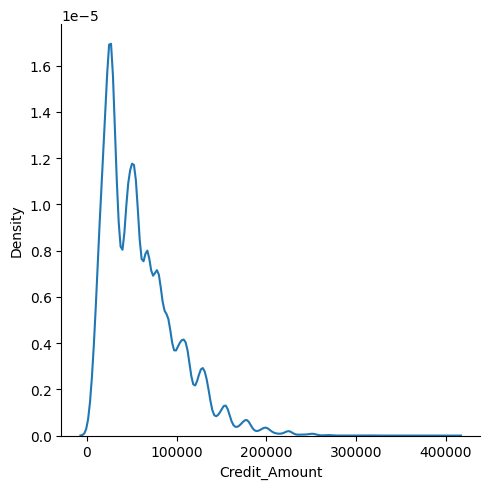

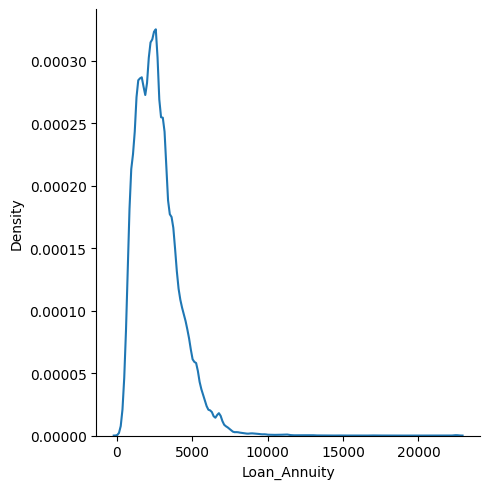

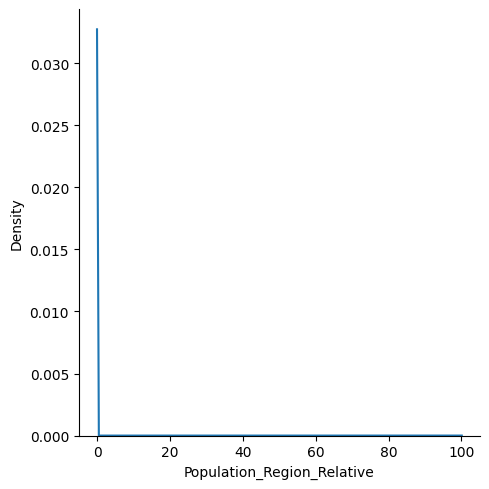

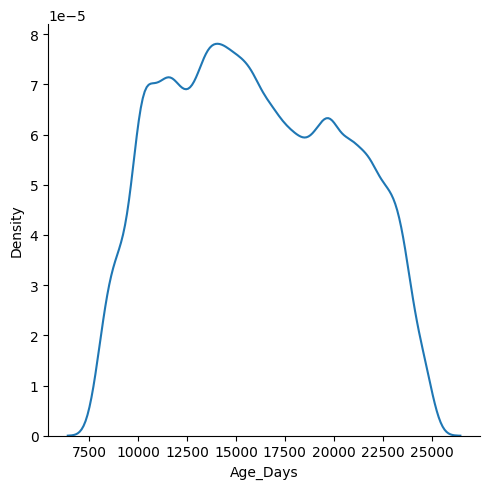

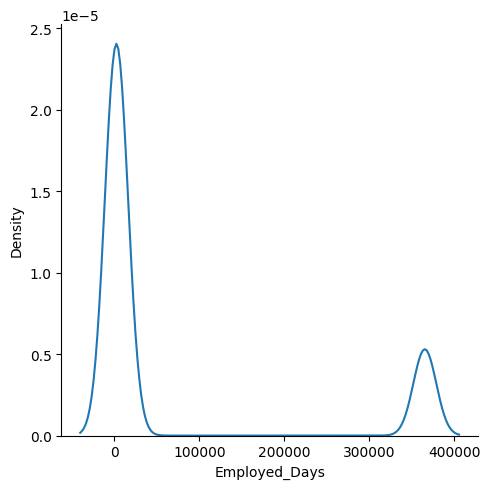

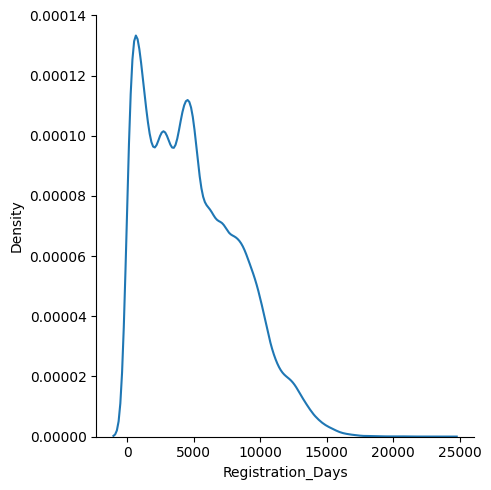

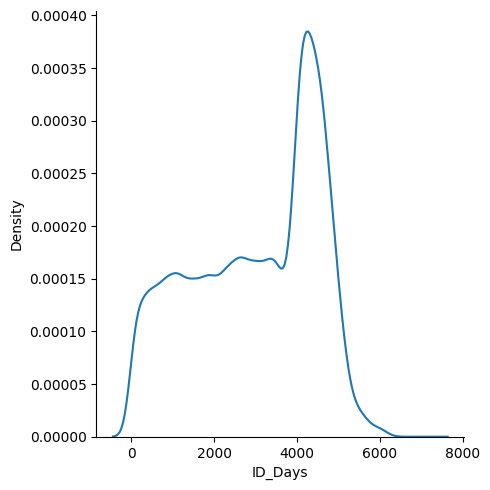

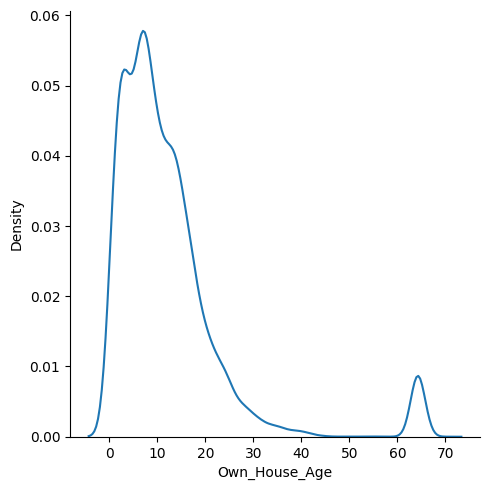

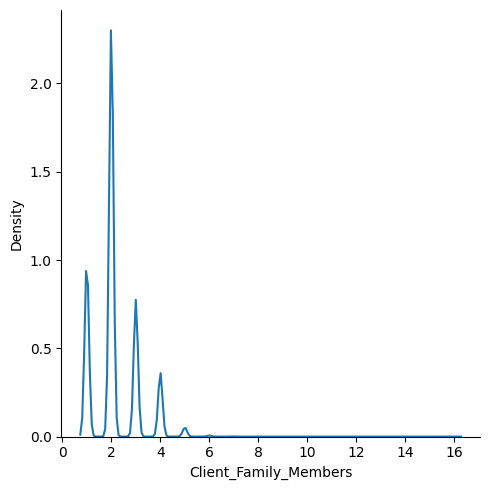

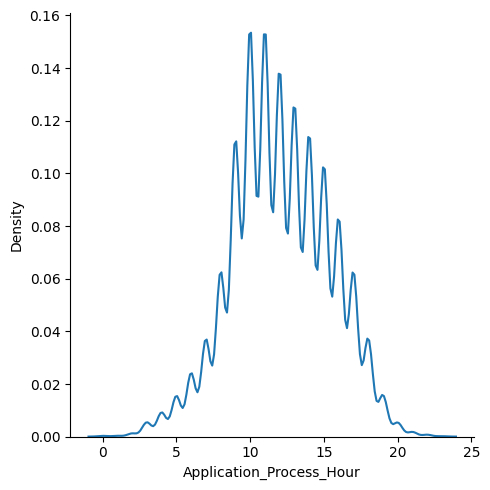

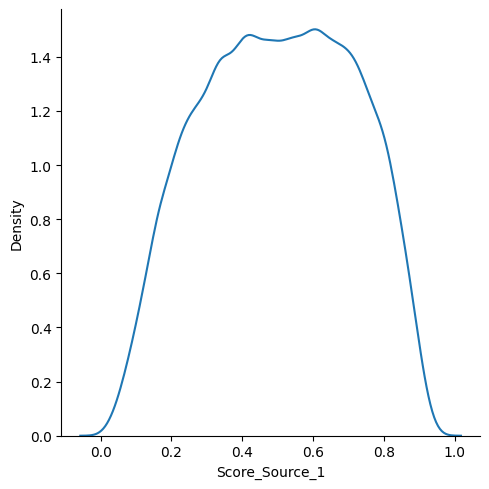

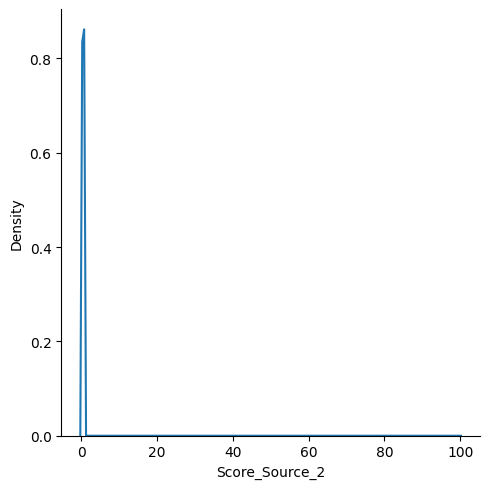

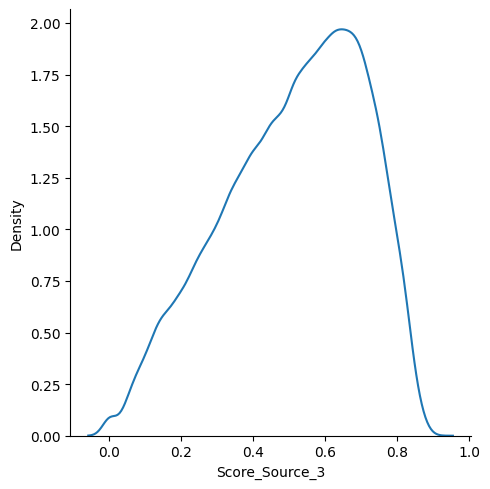

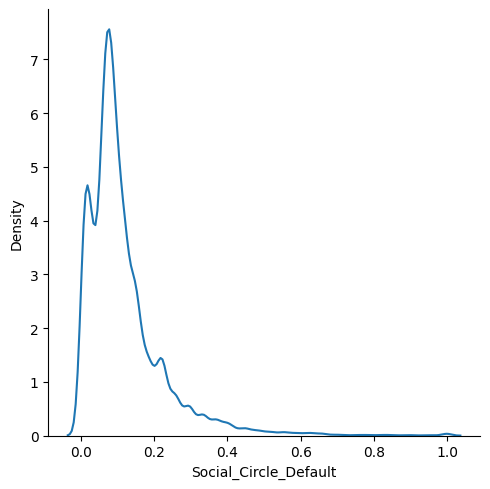

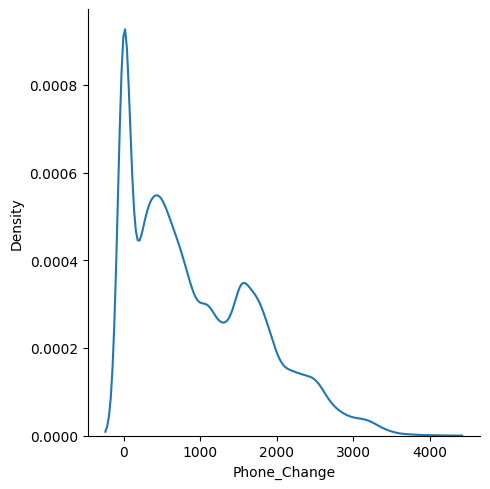

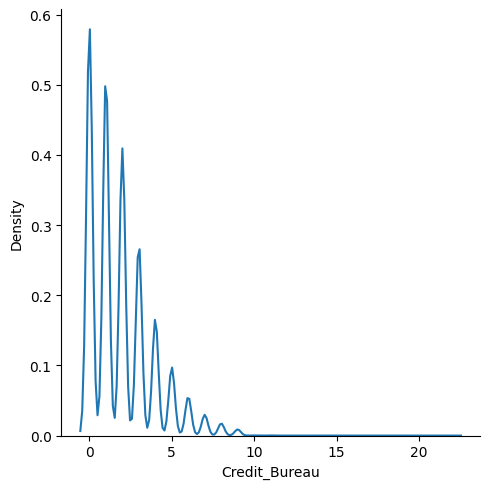

In [ ]:
# Univariate Analysis of Numerical column

for i in numeric_df:
  sns.displot(numeric_df[i], kind='kde')
  plt.show()

INFERENCES FROM DISPLOT:
  
  1.	Client Income: Right-skewed distribution with most incomes concentrated in the lower range. Potential outliers among high-income clients.

	2.	Child Count: Most clients have 0-2 children, with very few having more than 3. Outliers with unusually high child counts

	3.	Credit Amount: Right-skewed, most loans are small with fewer large loan amounts.

	4.	Loan Annuity: Right-skewed, most clients have low annuities, with outliers at the higher end.

	5.	Population Region Relative: Majority of clients are from less densely populated areas.

	6.	Age (in days): Clients are primarily within a working-age group.

	7.	Employment Days: Most clients have short employment tenure, extreme outliers are identified.

	8.	Registration Days: Skewed distribution, most clients have been registered for a shorter duration.

	9.	ID Days: Indicates issuance/verification timeframes, peaks at specific durations.

	10.	Own House Age: Concentrated at lower values, with a peak at older ages of house around 60-70 years.

	11.	Client Family Members: Most clients have 1-3 family members, outliers beyond 6 family members present in the dataset.

	12.	Application Process Hour: Most application process works are done during business hours (10 AM to 3 PM).

	13.	Score Source 1: Uniform distribution.

	14.	Score Source 2: Highly positively skewed after 0.

	15.	Score Source 3: Bell-shaped distribution between 0 and 1.

	16.	Social Circle Default: Right-skewed, higher values may indicate default risk based on social environment.

	17.	Phone Change: Right-skewed, frequent changes of phone could indicate instability.

	18.	Credit Bureau: Discrete values indicating the number of credit checks, higher counts may imply financial distress.

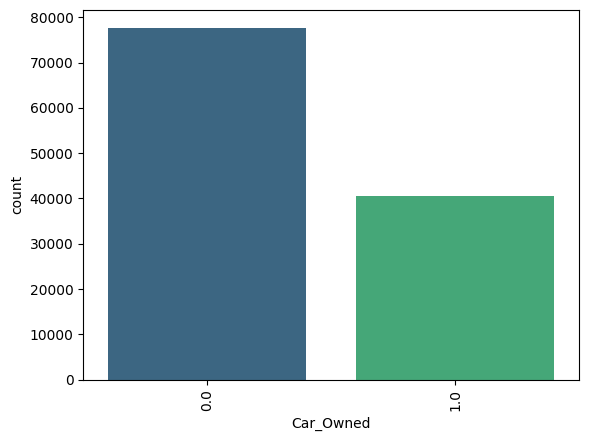

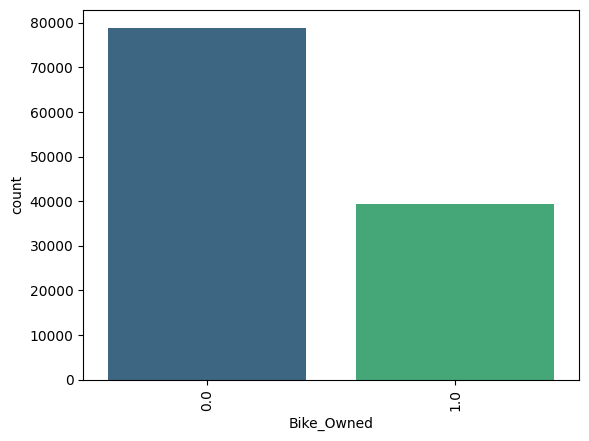

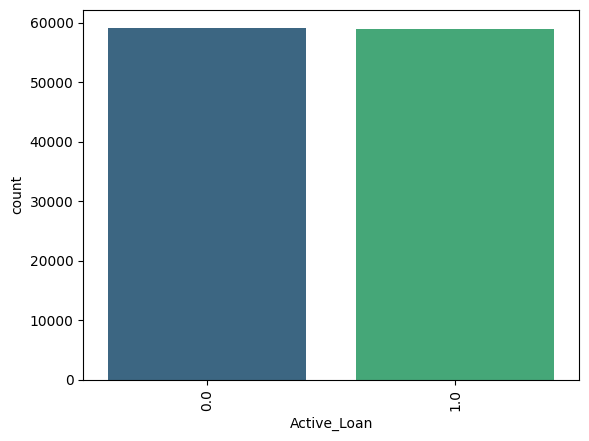

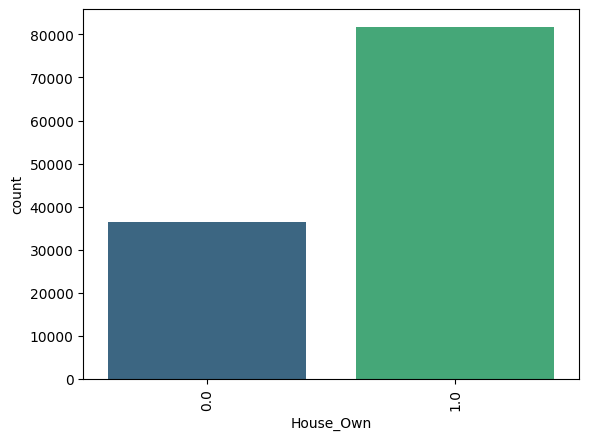

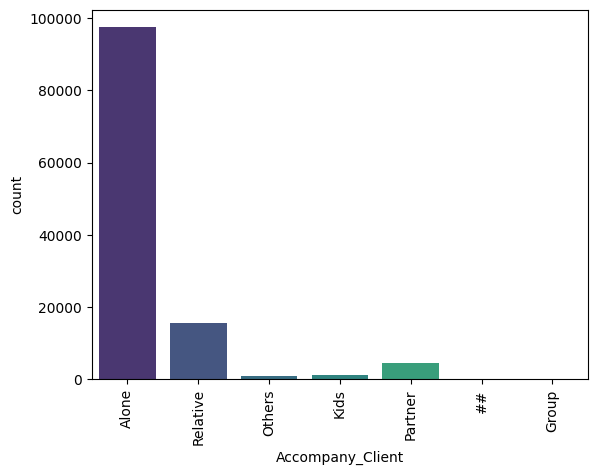

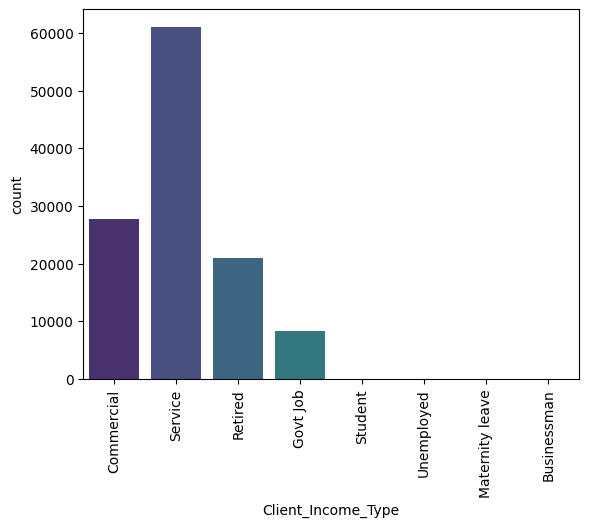

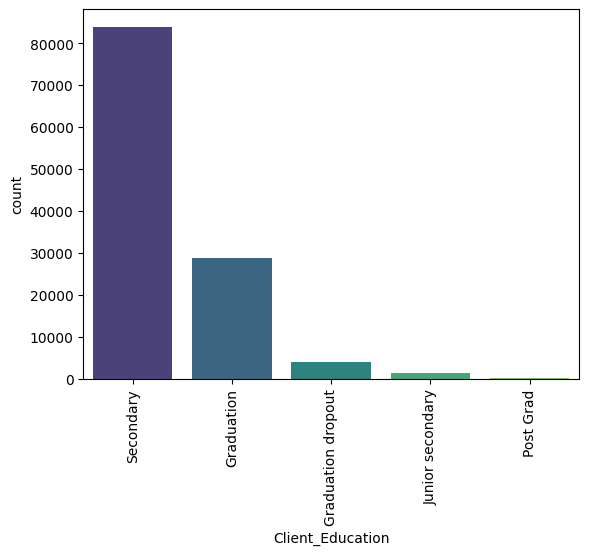

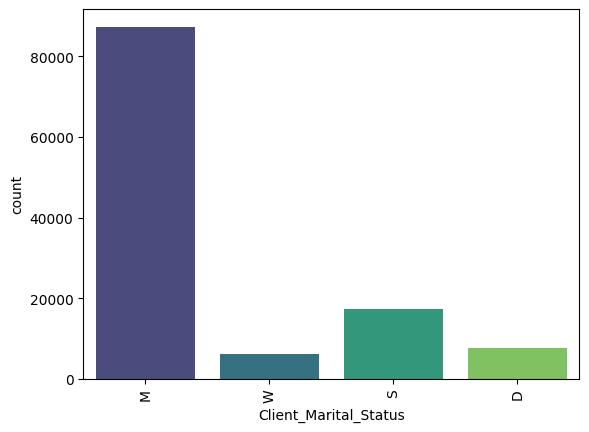

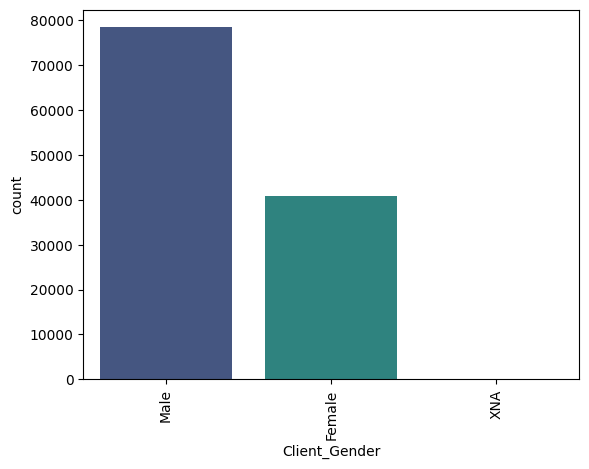

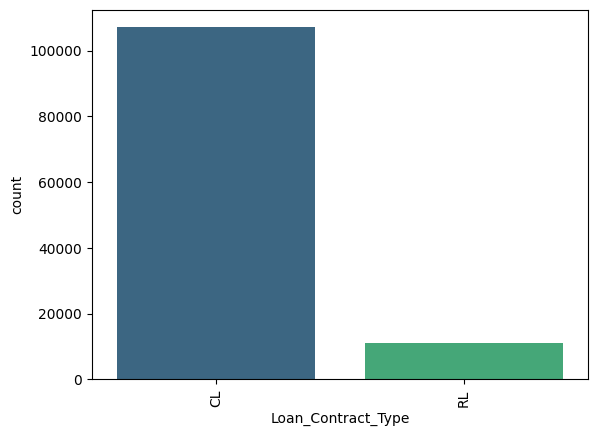

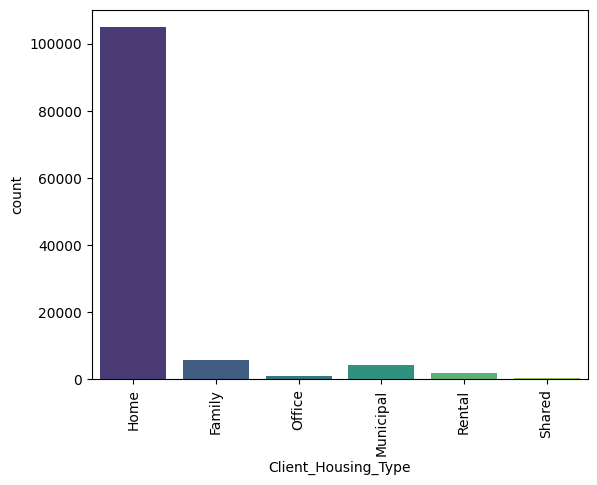

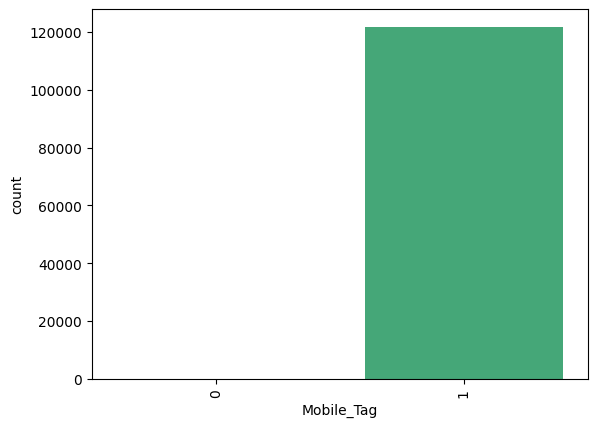

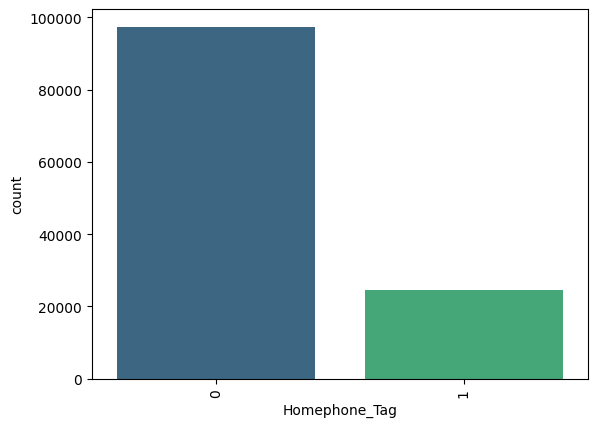

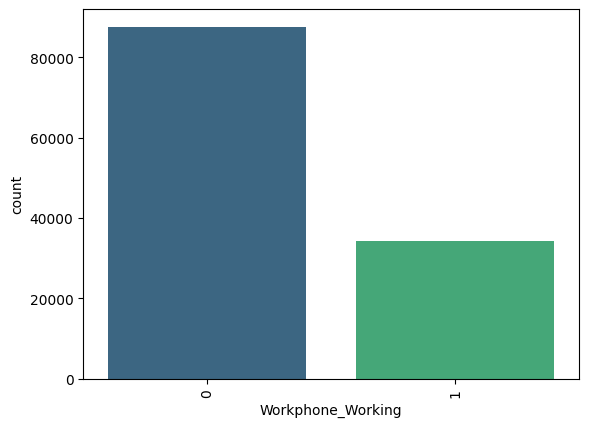

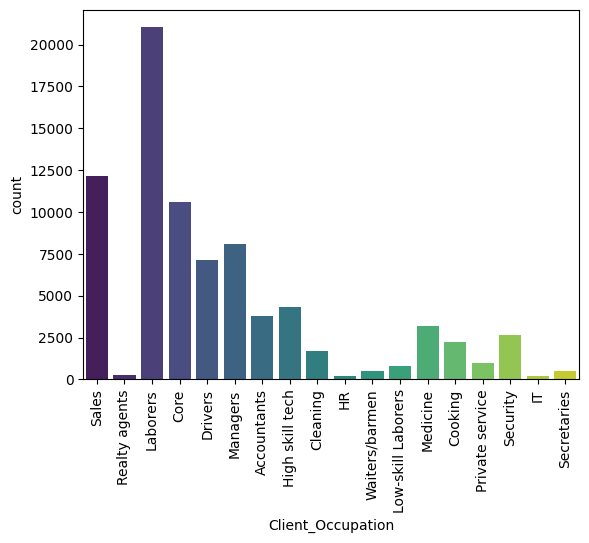

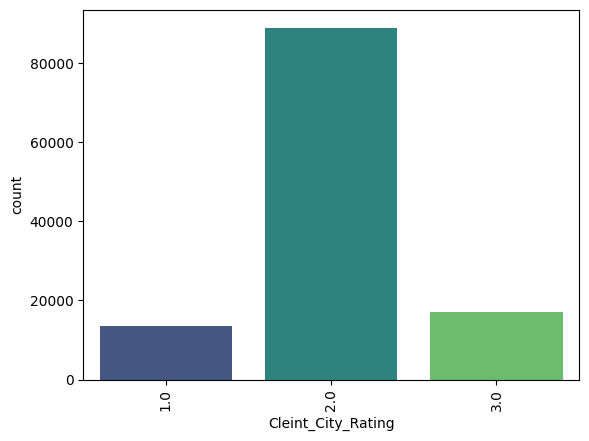

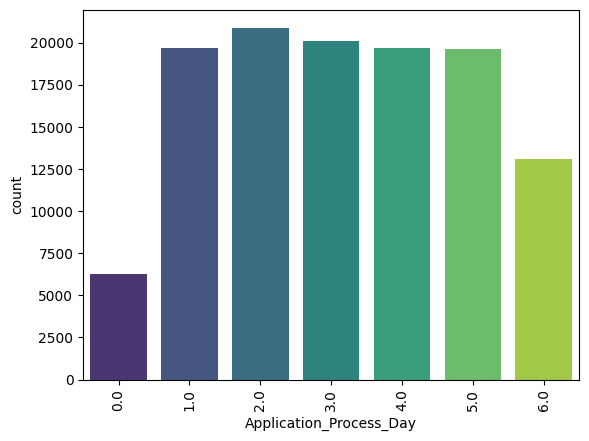

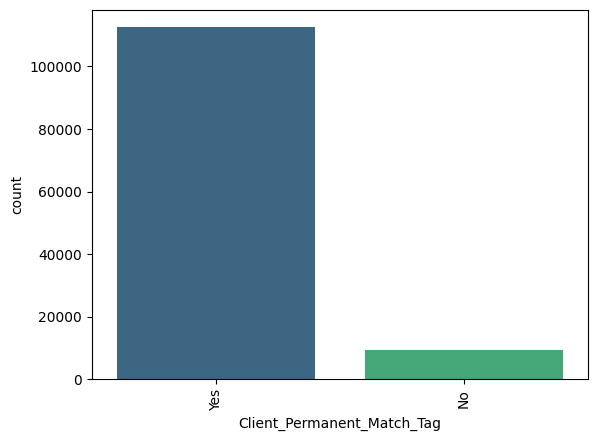

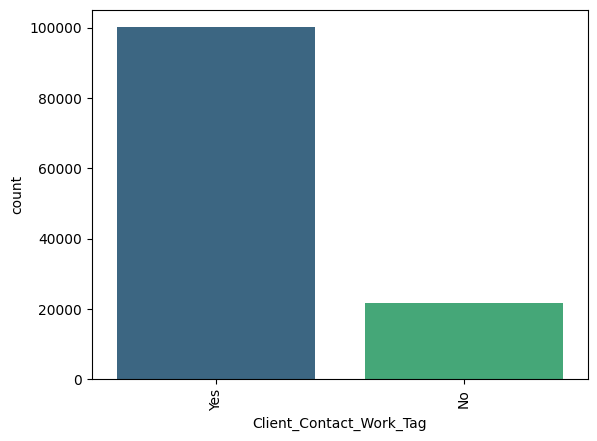

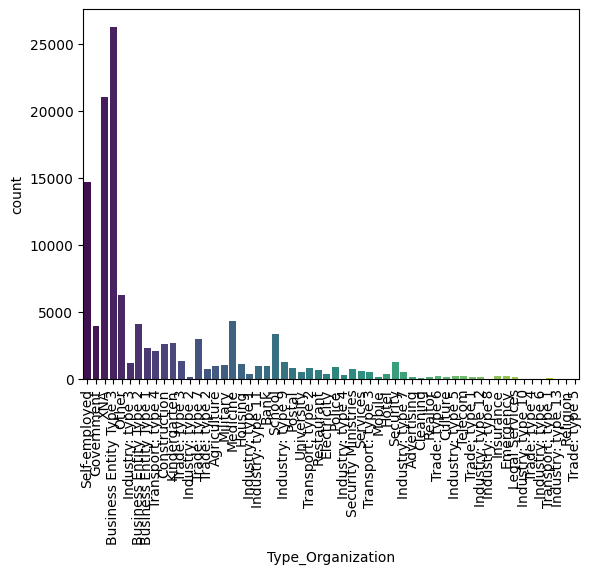

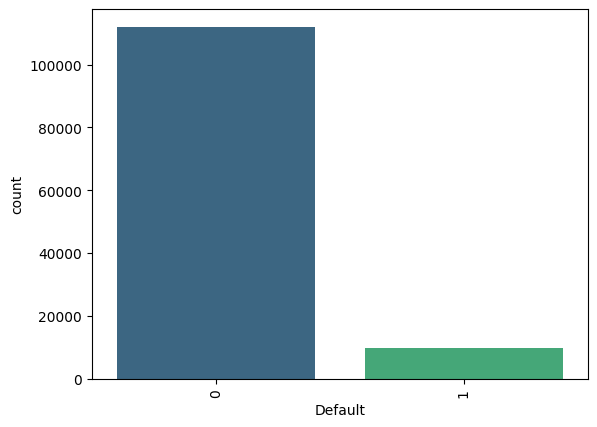

In [ ]:
# Univariate Analysis of Categorical columns

for i in object_df:
  sns.countplot(data = object_df, x=i, palette = "viridis")
  plt.xticks(rotation=90)
  plt.show()

INFERENCES FROM COUNT PLOTS:

1. Car_Owned: Most of the clients do not own a car.
2. Bike_Owned: Majority of clients do not own a bike.
3. Active_Loan: Clients with and without active loans are fairly evenly distributed.
4. House_Own: Most of the clients own a house.
5. Accompany_Client: Mostly clients apply for loans alone, followed by those applying with relatives and then partners and so on.
6. Client_Income_Type: 'Service' and 'Commercial' clients form the largest groups followed by 'Retired' and 'Govt Job'.
7. Client_Education: Majority of clients have secondary education, followed by graduates and so on.
8. Client_Marital_Status: Married clients are the largest group, followed by singles and divorced and widow groups are almost similar.
9. Client_Gender: More male clients are there than female clients.
10. Loan_Contract_Type: Most loans are Consumer Loans (CL), fewer are Revolving Loans (RL).
11. Client_Housing_Type: Most clients live in their own homes.
12. Mobile_Tag: Almost all clients have registered mobile tags.
13. Homephone_Tag: Fewer clients have a registered home phone.
14. Workphone_Working: Fewer clients have provided their workplace contact.
14. Client_Occupation: Dominated by sales, laborers, and core staff followed by others.
15. Client_City_Rating: Most clients are from cities with a rating of '2', followed by '1' and '3'.
16. Application_Process_Day: Mostly clients processed their applications on week days than weekends and the highest applications were processed on 'Tuesday'.
16. Client_Permanent_Match_Tag: Most clients have a permanent match tag.
17. Client_Contact_Work_Tag: Majority of clients have a contact work tag.
18. Type_Organization: Majority of clients are 'Business Entity Type 3 followed by 'XNA' and 'Self-employed' and so on.
19. Default: Most of clients have not defaulted their loan.

In [ ]:
mult_df = df_new.drop('Default',axis=1)

### Multivariate Analysis

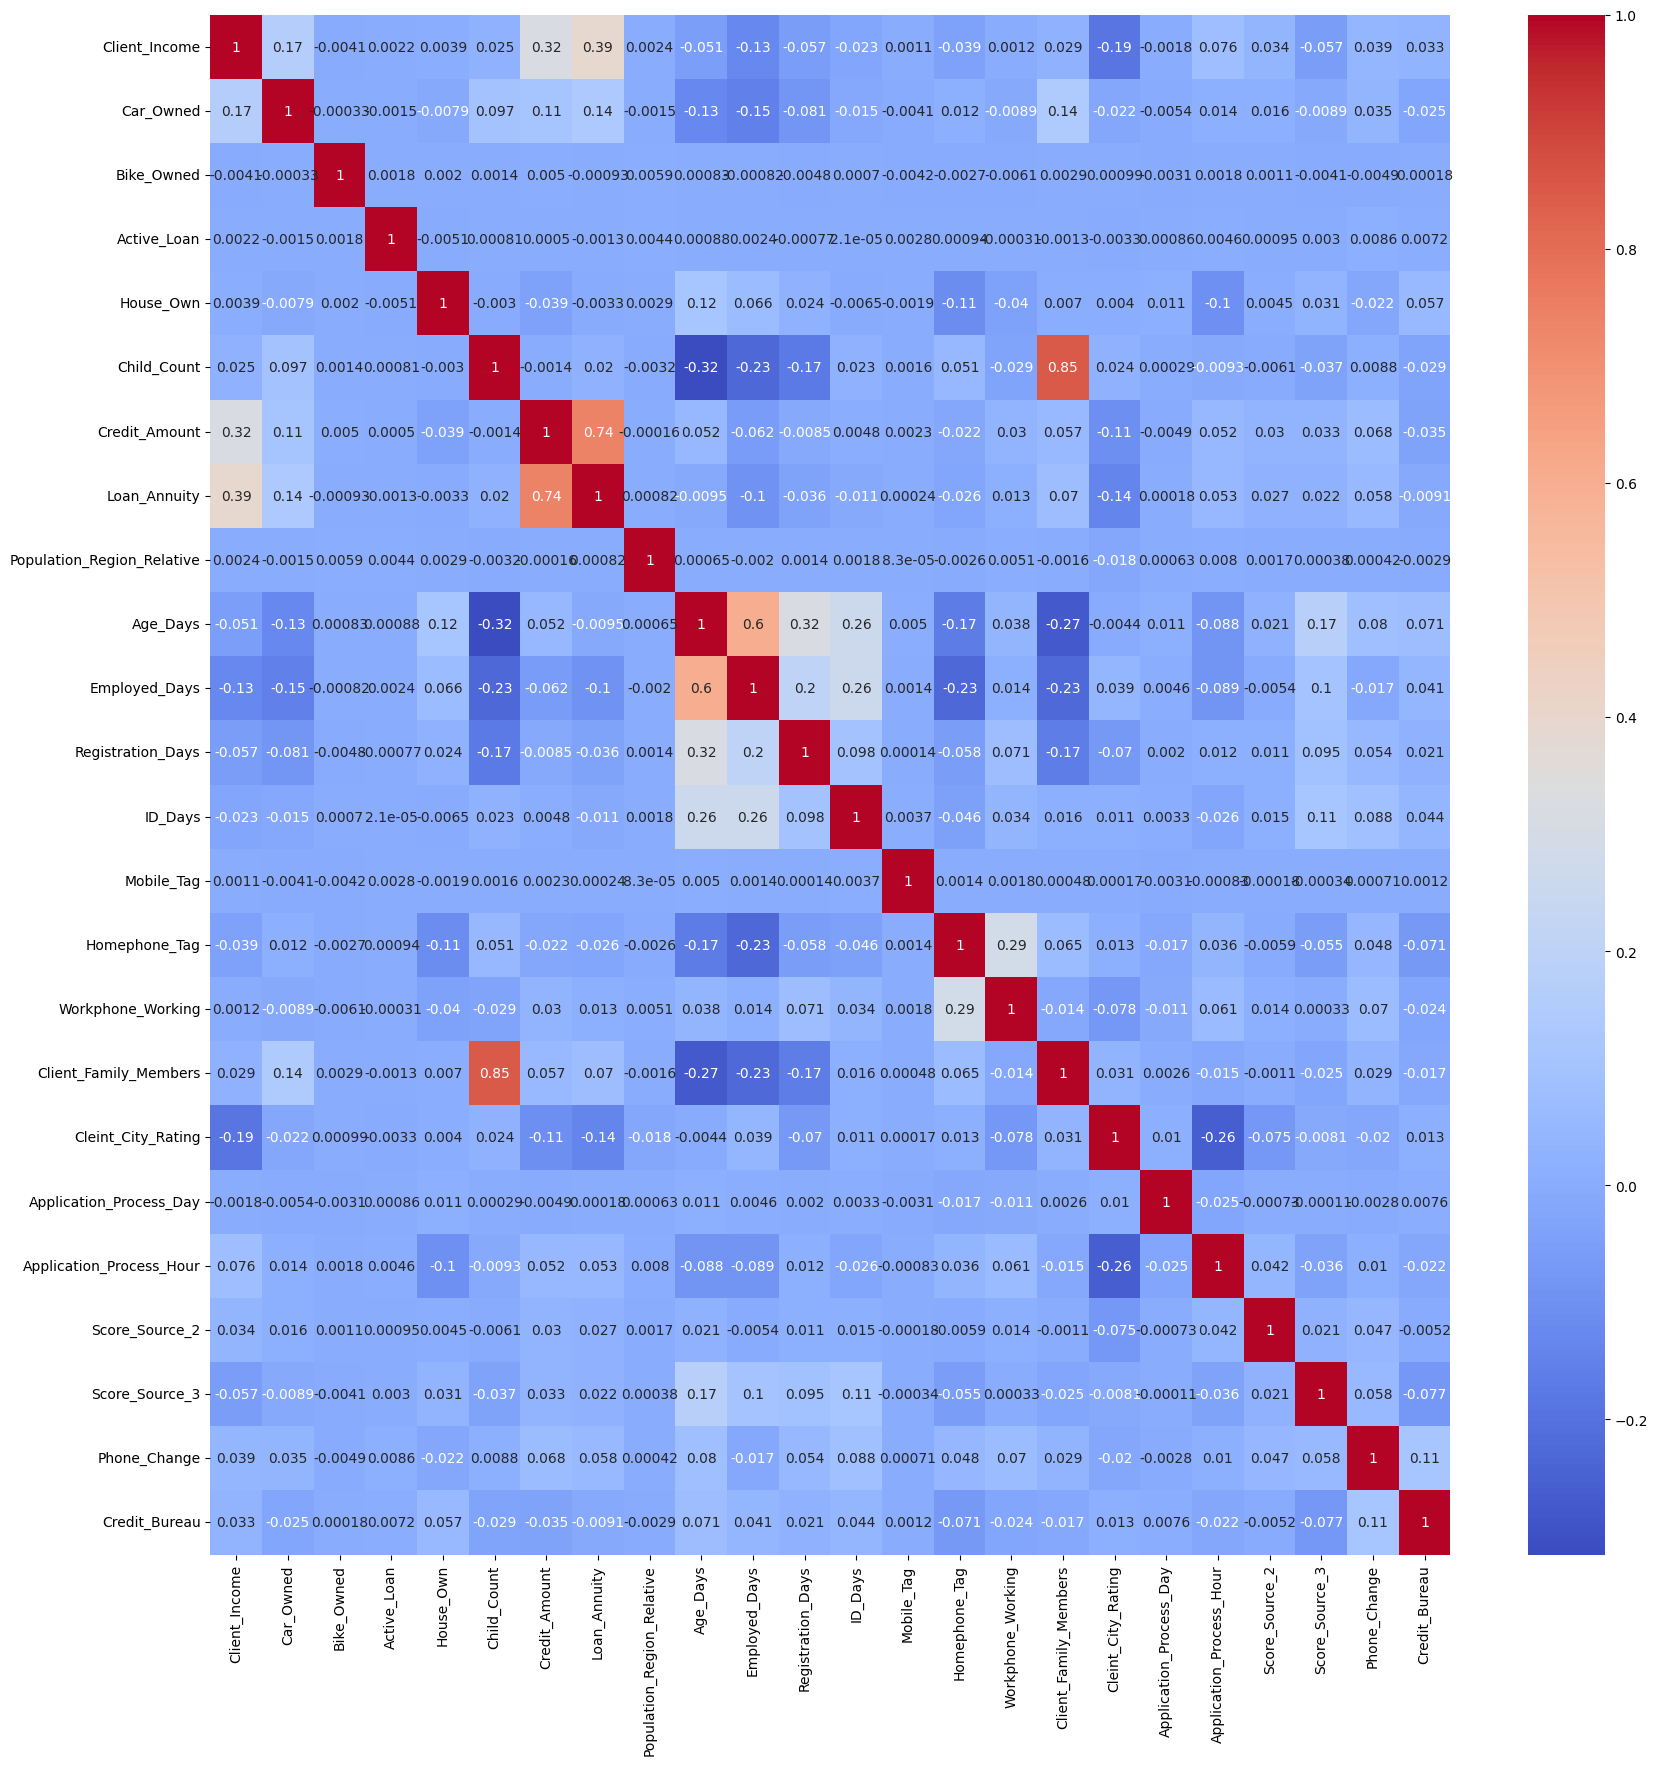

In [ ]:
# Multivariate Analysis

plt.figure(figsize=[20, 20])
sns.heatmap(mult_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

**INFERENCES FROM HEATMAP**:

1. Most of the columns have positive correlation.
2. Highly positive correlation is between Client Family Members with Child Count i.e., 0.85 followed by Loan Annuity with Credit Amount i.e., 0.74
3. Highly negative correlation is between Age Days and Child Count i.e., -0.32.

### Bivariate Analysis

In [ ]:
# Bivariate Analysis of Numerical columns

for i in numeric_df.columns:
  if i != 'Credit_Amount':
    sns.scatterplot(data=numeric_df, x=i, y='Credit_Amount',hue = df_new['Default'])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

**INFERENCES FROM SCATTERPLOT**:

1. Client_Income: Mostly clients have an income between 0 and 0.25 and most of them have not defaulted on their loan. And some of them who defaulted are overlapped.
2. Child_Count: Mostly clients have less than 3 children and they have not defaulted their loan, very few of them defaulted their loan.
3. Loan_Annuity: Most of the clients have a good loan annuity and a good credit amount and have not defaulted loans, some of them have defaulted loans but it is overlapped with the non-defaulter category.
4. Population_Region_Relative: Just one or two of the clients have defaulted loan.
5. Age_Days: Mostly clients have not defaulted loans whatever being the age but there are few of them inside the same category who defaulted also.
6. Employed_Days: In 0 employed days and more than 350000 employed days very few clients have defaulted loan.
7. Registration_Days: Some clients have defaulted loans but out of that most of them have not defaulted loans.
8. ID_Days: Unequal distribution of loan defaults with no loan default being more and defaulted loan being less and some outliers are also there.
9. Own_House_Age: Minority of clients have defaulted their loan.
10. Client_Family_Members: Mostly clients have not defaulted their loan but clients with 8 family members have defaulted loans.
11. Application_Process_Hour: Few clients have defaulted loans irrespective of their application process hour.
12. Score_Source_1: Most of the defaulted loan clients lies between 0.0 and 0.2 and in other categories there are less defaulted loans and mostly clients have not defaulted loans.
13. Score_Source_2: Minority of clients have defaulted their loans on 0 overlapped with the non-defaulter category at 0.
14. Score_Source_3: Maximum clients who defaulted loans lies between 0.0 and
0.4 which is again overlapped by non-defaulter category.
15. Social_Circle_Default: Majority of clients have not defaulted their loans although some clients have defaulted also.
16. Phone_Change: Maximum clients who changed their phone have not defaulted loans.
17. Credit_Bureau: Some of the clients have defaulted loans with some outliers.

Overall, it's visible that whatever being the category maximum clients have not defaulted their loans.

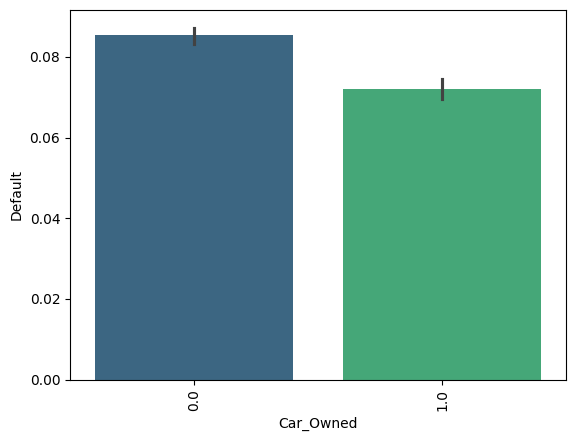

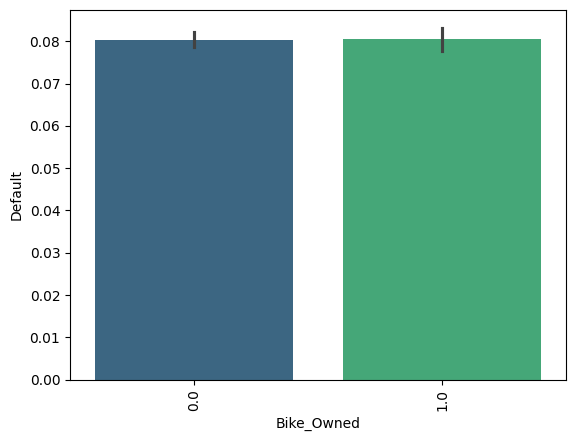

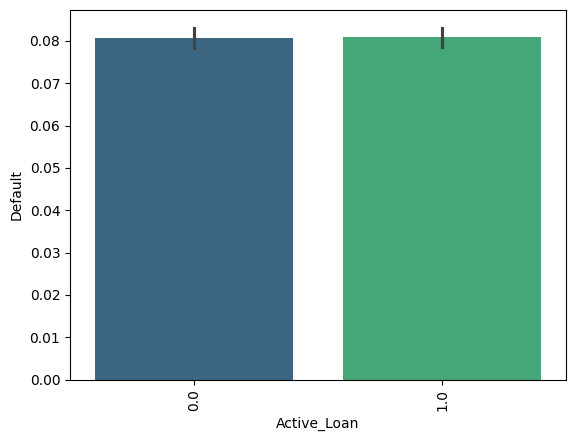

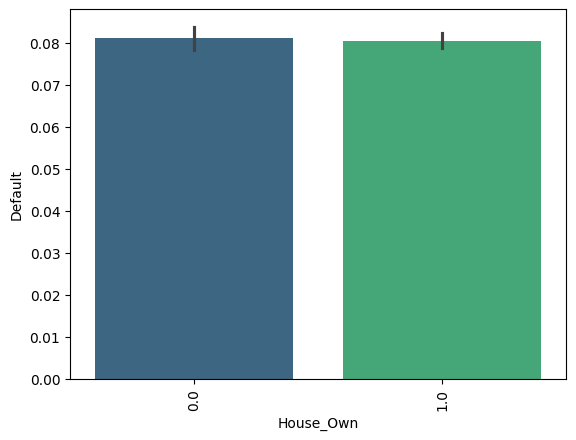

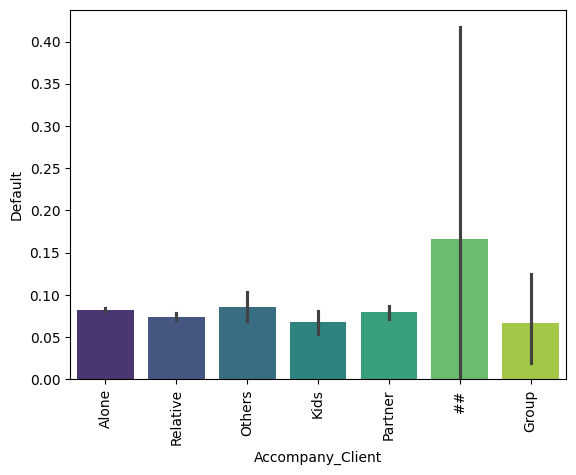

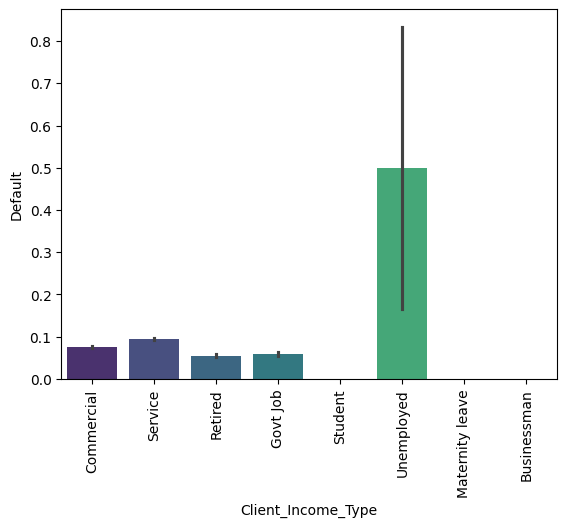

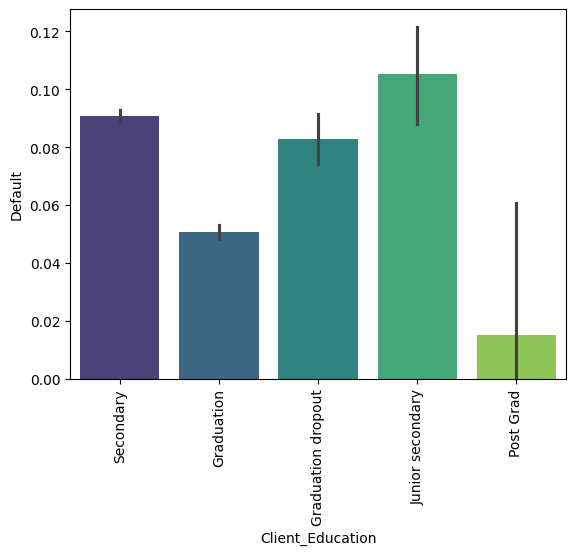

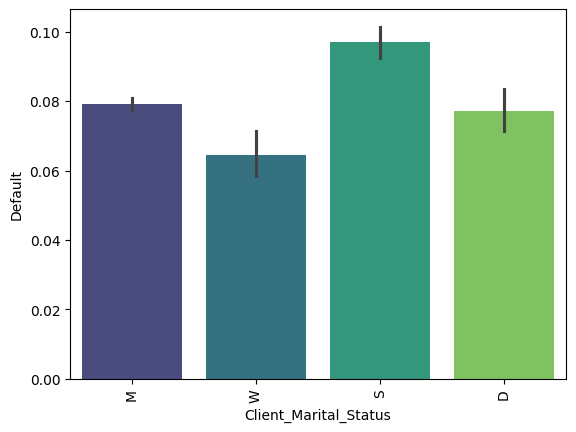

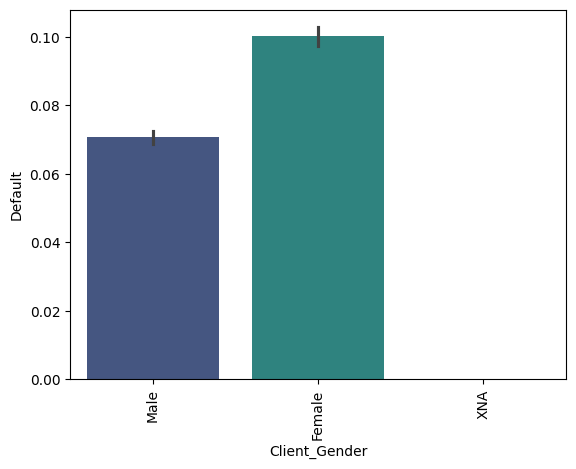

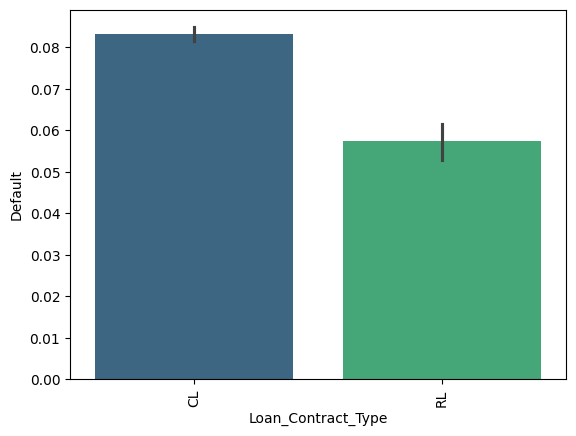

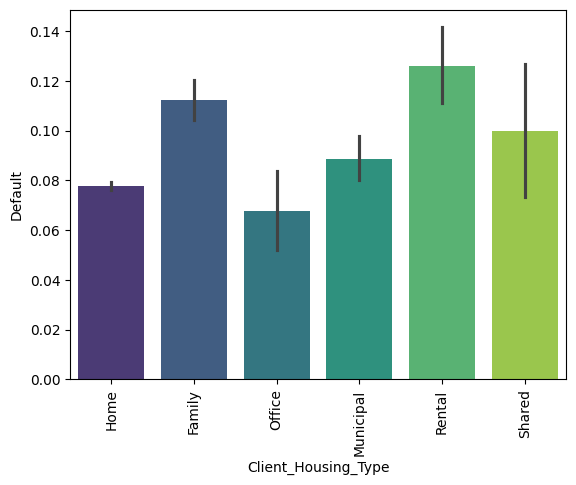

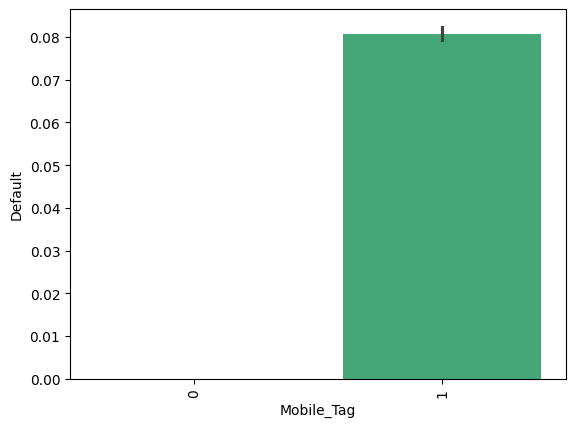

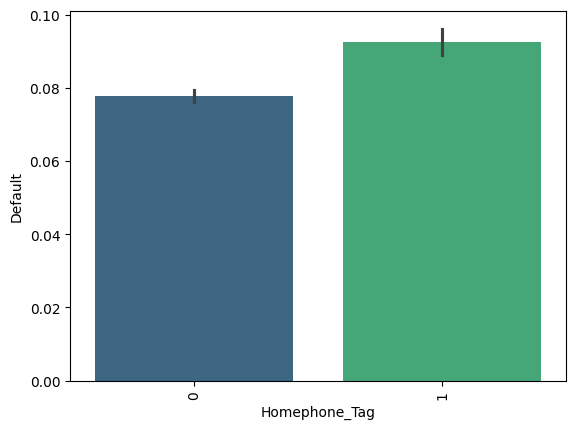

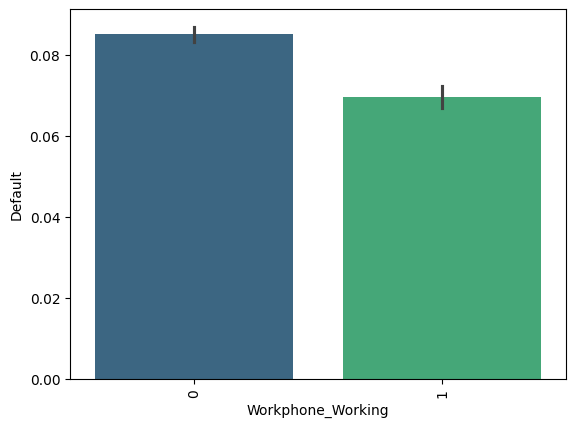

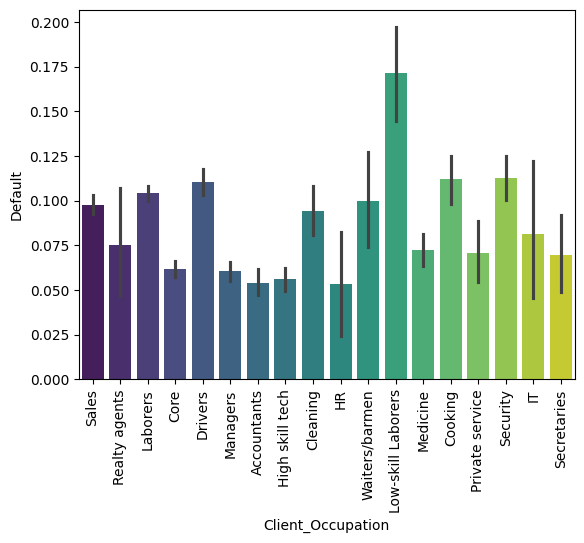

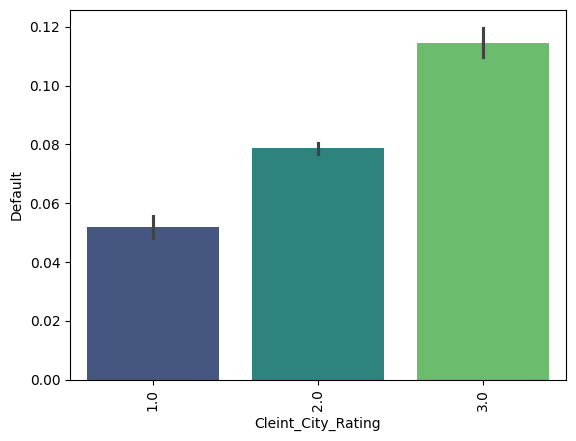

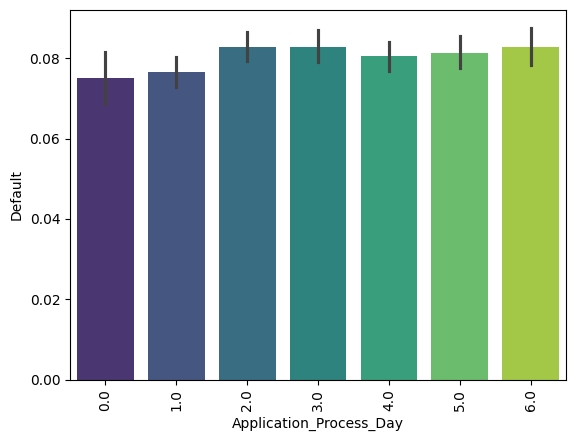

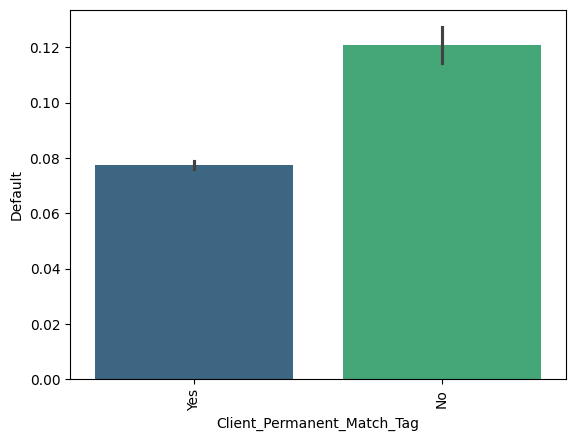

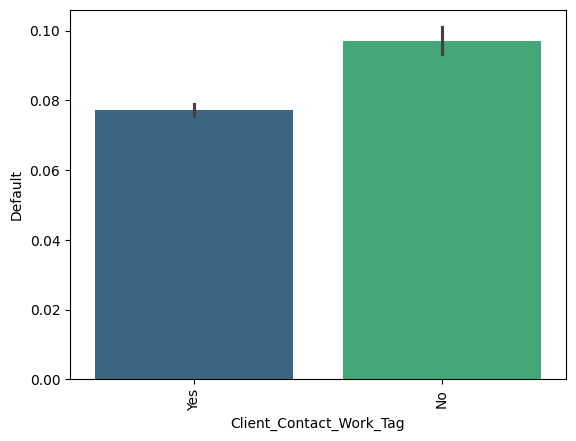

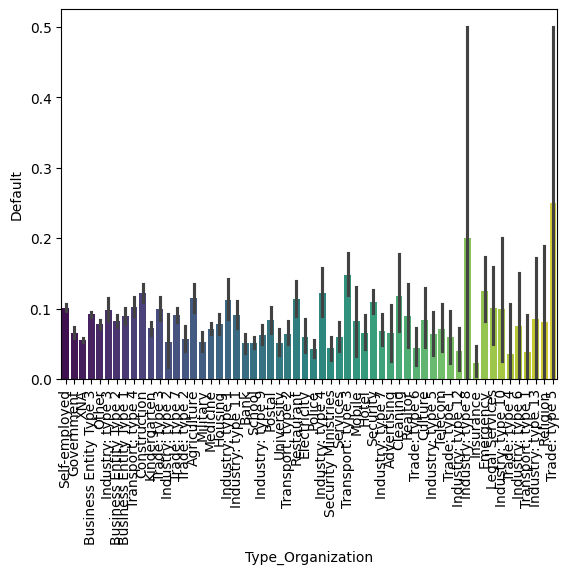

In [ ]:
# Bivariate Analysis of Categorical columns

for i in object_df.columns:
  if i != 'Default':
    sns.barplot(data=object_df, x=i, y='Default', palette='viridis')
    plt.xticks(rotation=90)
    plt.show()

**INFERENCES FROM BARPLOT**:

1. Car_Owned: Maximum clients who have no car before applying for loan are the defaulters.
2. Bike_Owned: Loan defaulter clients are almost equal who owns a bike and who don't.
3. Active_Loan: Loan defaulter clients are equal weather they an active loan or not.
4. House_Own: Clients who owns a house and who don't have almost equal number of defaulters.
5. Accompany_Client: ## category of accompany client have maximum number of defaulters followed by 'Others', 'Alone' and 'Partner'.
6. Client_Income_Type: Maximum number of loan defaulters are the 'Unemployed' onesfollowed by 'Service' ones and no defaulters in 'Maternity leave' and 'Businessman' category.
7. Client_Education: Clients with 'Junior Secondary' education are the highest defaulter loans follwed by 'Secondary' education ones.
8. Client_Marital_Status: 'Single' clients have maximum loan defaulters followed by 'Married' and 'Divorced' and then 'Widow'.
9. Client_Gender: 'Female' clients have more defaulted loans than 'Male' clients.
10. Loan_Contract_Type: Maximum number of defaulters are in 'Cash Loan' category.
11. Client_Housing_Type: The 'Rental' one's have maximum number of defaulters followed by 'Family' and then 'Shared' then others.
12. Mobile_Tag: Clients who provided number have maximum number of defaulter loans.
13. Homephone_Tag: Clients who provided home phone number have maximum loan defaulters than those who have not provided phone number.
14. Workphone_Working: Clients whose workphone is not reachable have maximum number of defaulters than those whose workphone is reachable.
15. Client_Occupation: Clients who are 'Low Skill Labourers' have maximum defaulters than others.
16. Client_City_Rating: Clients whose city rating is 3 means best have maximum number of loan defaulters.
17. Application_Process_Day: Almost all days have equal number of loan defaulters except 'Tuesday' and 'Wednesday' are being the highest.
18. Client_Permanent_Match_Tag: Client permanent match tag of 'No' category have maximum number of defaulters.
19. Client_Contact_Work_Tag: Client contact work tag of 'No' category have maximum defaulters.
20. Type_Organization: 'Industry: Type 8' and 'Trade: Type 5' have maximum defaulters than others.



## STEP 3: STATISTICAL ANALYSIS

#### Chi Square Test

In [ ]:
# Assuming 'Car_Owned' and 'Default' are the columns to be analyzed
# Ho : Car owned is not dependent on Default
# Ha : Car owned is dependent on Default

observed = pd.crosstab(df_new['Car_Owned'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 61.909287385348996, p_value: 3.596492698790053e-15, dof: 1, expected: [[74736.19973575  6568.80026425]
 [37274.80026425  3276.19973575]]
Reject Ho


In [ ]:
# Assuming 'Bike_Owned' and 'Default' are the columns to be analyzed
# Ho : Bike owned is not dependent on Default
# Ha : Bike owned is dependent on Default

observed = pd.crosstab(df_new['Bike_Owned'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 0.020308091977580954, p_value: 0.8866799747906008, dof: 1, expected: [[75900.83616728  6671.16383272]
 [36110.16383272  3173.83616728]]
Fail to reject Ho


In [ ]:
# Assuming 'Active_Loan' and 'Default' are the columns to be analyzed
# Ho : Active Loan is not dependent on Default
# Ha : Active Loan is dependent on Default

observed = pd.crosstab(df_new['Active_Loan'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 0.0002273535202817874, p_value: 0.9879697556952525, dof: 1, expected: [[57765.78316209  5077.21683791]
 [54245.21683791  4767.78316209]]
Fail to reject Ho


In [ ]:
# Assuming 'House_Own' and 'Default' are the columns to be analyzed
# Ho : House_Own is not dependent on Default
# Ha : House_Own is dependent on Default

observed = pd.crosstab(df_new['House_Own'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 0.04188440998957393, p_value: 0.8378402665046734, dof: 1, expected: [[33456.41057478  2940.58942522]
 [78554.58942522  6904.41057478]]
Fail to reject Ho


In [ ]:
# Assuming 'Accompany_Client' and 'Default' are the columns to be analyzed
# Ho : Accompany_Client is not dependent on Default
# Ha : Accompany_Client is dependent on Default

observed = pd.crosstab(df_new['Accompany_Client'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 15.920321146240923, p_value: 0.014188085951273398, dof: 6, expected: [[1.10304950e+01 9.69504989e-01]
 [9.11440611e+04 8.01093894e+03]
 [9.55976234e+01 8.40237658e+00]
 [1.22622336e+03 1.07776638e+02]
 [9.07258215e+02 7.97417854e+01]
 [4.15114296e+03 3.64857044e+02]
 [1.44756863e+04 1.27231371e+03]]
Reject Ho


In [ ]:
# Assuming 'Client_Income_Type' and 'Default' are the columns to be analyzed
# Ho : Client_Income_Type is not dependent on Default
# Ha : Client_Income_Type is dependent on Default

observed = pd.crosstab(df_new['Client_Income_Type'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 415.51178333238437, p_value: 1.1227990237644692e-85, dof: 7, expected: [[9.19207918e-01 8.07920825e-02]
 [2.55208886e+04 2.24311138e+03]
 [7.63218334e+03 6.70816661e+02]
 [1.83841584e+00 1.61584165e-01]
 [1.93428922e+04 1.70010779e+03]
 [5.94994093e+04 5.22959071e+03]
 [7.35366334e+00 6.46336660e-01]
 [5.51524751e+00 4.84752495e-01]]
Reject Ho


In [ ]:
# Assuming 'Client_Education' and 'Default' are the columns to be analyzed
# Ho : Client_Education is not dependent on Default
# Ha : Client_Education is dependent on Default

observed = pd.crosstab(df_new['Client_Education'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 468.4066625676384, p_value: 4.5522808593584497e-100, dof: 4, expected: [[2.64906530e+04 2.32834702e+03]
 [3.64006335e+03 3.19936647e+02]
 [1.33744752e+03 1.17552480e+02]
 [6.06677226e+01 5.33227744e+00]
 [8.04821684e+04 7.07383157e+03]]
Reject Ho


In [ ]:
# Assuming 'Client_Marital_Status' and 'Default' are the columns to be analyzed
# Ho : Client_Marital_Status is not dependent on Default
# Ha : Client_Marital_Status is dependent on Default

observed = pd.crosstab(df_new['Client_Marital_Status'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 87.97954461625261, p_value: 5.94936101801255e-19, dof: 3, expected: [[ 6945.53502495   610.46497505]
 [83484.301487    7337.698513  ]
 [15997.8945969   1406.1054031 ]
 [ 5583.26889115   490.73110885]]
Reject Ho


In [ ]:
# Assuming 'Client_Gender' and 'Default' are the columns to be analyzed
# Ho : Client_Gender is not dependent on Default
# Ha : Client_Gender is dependent on Default

observed = pd.crosstab(df_new['Client_Gender'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 311.84414209936716, p_value: 1.9226708246242945e-68, dof: 2, expected: [[3.76663828e+04 3.31061716e+03]
 [7.43418595e+04 6.53414046e+03]
 [2.75762375e+00 2.42376247e-01]]
Reject Ho


In [ ]:
# Assuming 'Loan_Contract_Type' and 'Default' are the columns to be analyzed
# Ho : Loan_Contract_Type is not dependent on Default
# Ha : Loan_Contract_Type is dependent on Default

observed = pd.crosstab(df_new['Loan_Contract_Type'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 89.10154162097677, p_value: 3.750585850711344e-21, dof: 1, expected: [[101819.74181821   8949.25818179]
 [ 10191.25818179    895.74181821]]
Reject Ho


In [ ]:
# Assuming 'Client_Housing_Type' and 'Default' are the columns to be analyzed
# Ho : Client_Housing_Type is not dependent on Default
# Ha : Client_Housing_Type is dependent on Default

observed = pd.crosstab(df_new['Client_Housing_Type'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 146.86159887446598, p_value: 6.214856368473498e-30, dof: 5, expected: [[5.31577939e+03 4.67220613e+02]
 [9.97864539e+04 8.77054610e+03]
 [3.90479523e+03 3.43204766e+02]
 [9.21046333e+02 8.09536666e+01]
 [1.66928158e+03 1.46718422e+02]
 [4.13643563e+02 3.63564371e+01]]
Reject Ho


In [ ]:
# Assuming 'Mobile_Tag' and 'Default' are the columns to be analyzed
# Ho : Mobile_Tag is not dependent on Default
# Ha : Mobile_Tag is dependent on Default

observed = pd.crosstab(df_new['Mobile_Tag'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 0.0, p_value: 1.0, dof: 1, expected: [[9.19207918e-01 8.07920825e-02]
 [1.12010081e+05 9.84491921e+03]]
Fail to reject Ho


In [ ]:
# Assuming 'Homephone_Tag' and 'Default' are the columns to be analyzed
# Ho : Homephone_Tag is not dependent on Default
# Ha : Homephone_Tag is dependent on Default

observed = pd.crosstab(df_new['Homephone_Tag'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 56.6180497038841, p_value: 5.292381381867784e-14, dof: 1, expected: [[89552.91215861  7871.08784139]
 [22458.08784139  1973.91215861]]
Reject Ho


In [ ]:
# Assuming 'Workphone_Working' and 'Default' are the columns to be analyzed
# Ho : Workphone_Working is not dependent on Default
# Ha : Workphone_Working is dependent on Default

observed = pd.crosstab(df_new['Workphone_Working'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 80.1615155656507, p_value: 3.4502202691513496e-19, dof: 1, expected: [[80513.42149751  7076.57850249]
 [31497.57850249  2768.42149751]]
Reject Ho


In [ ]:
# Assuming 'Client_Occupation' and 'Default' are the columns to be analyzed
# Ho : Client_Occupation is not dependent on Default
# Ha : Client_Occupation is dependent on Default

observed = pd.crosstab(df_new['Client_Occupation'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 469.6394585204945, p_value: 4.639141566695157e-89, dof: 17, expected: [[3.46173702e+03 3.04262983e+02]
 [1.58287603e+03 1.39123966e+02]
 [2.04431841e+03 1.79681591e+02]
 [9.75371521e+03 8.57284787e+02]
 [6.57233661e+03 5.77663390e+02]
 [1.89356831e+02 1.66431690e+01]
 [3.96822058e+03 3.48779420e+02]
 [1.80164752e+02 1.58352482e+01]
 [5.74128073e+04 5.04619268e+03]
 [7.23416631e+02 6.35833689e+01]
 [7.44466492e+03 6.54335076e+02]
 [2.91572751e+03 2.56272486e+02]
 [9.24723165e+02 8.12768350e+01]
 [2.57378217e+02 2.26217831e+01]
 [1.11555073e+04 9.80492713e+02]
 [4.88099404e+02 4.29005958e+01]
 [2.46623484e+03 2.16765157e+02]
 [4.69715246e+02 4.12847541e+01]]
Reject Ho


In [ ]:
# Assuming 'Cleint_City_Rating' and 'Default' are the columns to be analyzed
# Ho : Cleint_City_Rating is not dependent on Default
# Ha : Cleint_City_Rating is dependent on Default

observed = pd.crosstab(df_new['Cleint_City_Rating'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 419.5459821755529, p_value: 7.884016386006542e-92, dof: 2, expected: [[12367.94253053  1087.05746947]
 [83976.9969308   7381.0030692 ]
 [15666.06053867  1376.93946133]]
Reject Ho


In [ ]:
# Assuming 'Application_Process_Day' and 'Default' are the columns to be analyzed
# Ho : Application_Process_Day is not dependent on Default
# Ha : Application_Process_Day is dependent on Default

observed = pd.crosstab(df_new['Application_Process_Day'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 10.863377724779838, p_value: 0.09269180473590959, dof: 6, expected: [[ 5779.06017759   507.93982241]
 [18119.42647059  1592.57352941]
 [21449.71675584  1885.28324416]
 [18490.78646928  1625.21353072]
 [18078.98132222  1589.01867778]
 [18028.42488675  1584.57511325]
 [12064.60391774  1060.39608226]]
Fail to reject Ho


In [ ]:
# Assuming 'Client_Permanent_Match_Tag' and 'Default' are the columns to be analyzed
# Ho : Client_Permanent_Match_Tag is not dependent on Default
# Ha : Client_Permanent_Match_Tag is dependent on Default

observed = pd.crosstab(df_new['Client_Permanent_Match_Tag'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 219.27913670613523, p_value: 1.2990426317640464e-49, dof: 1, expected: [[  8642.39284073    759.60715927]
 [103368.60715927   9085.39284073]]
Reject Ho


In [ ]:
# Assuming 'Client_Contact_Work_Tag' and 'Default' are the columns to be analyzed
# Ho : Client_Contact_Work_Tag is not dependent on Default
# Ha : Client_Contact_Work_Tag is dependent on Default

observed = pd.crosstab(df_new['Client_Contact_Work_Tag'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 95.15504007067565, p_value: 1.7604342055180362e-22, dof: 1, expected: [[20076.42012704  1764.57987296]
 [91934.57987296  8080.42012704]]
Reject Ho


In [ ]:
# Assuming 'Type_Organization' and 'Default' are the columns to be analyzed
# Ho : Type_Organization is not dependent on Default
# Ha : Type_Organization is dependent on Default

observed = pd.crosstab(df_new['Type_Organization'], df_new['Default'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the values
print(f' Chi-Square Statistics: {chi2}, p_value: {p_value}, dof: {dof}, expected: {expected}')

# Consider alpha as 0.05
alpha = 0.05

if p_value<0.05:
  print('Reject Ho')
else:
  print('Fail to reject Ho')

 Chi-Square Statistics: 665.8985220268066, p_value: 1.1118814995532018e-104, dof: 57, expected: [[1.39719603e+02 1.22803965e+01]
 [9.29319205e+02 8.16807954e+01]
 [9.30238413e+02 8.17615874e+01]
 [2.12612791e+03 1.86872087e+02]
 [3.79265187e+03 3.33348132e+02]
 [2.74732862e+04 2.41471376e+03]
 [1.08466534e+02 9.53346573e+00]
 [2.41108237e+03 2.11917632e+02]
 [1.20416237e+02 1.05837628e+01]
 [3.36430098e+02 2.95699022e+01]
 [1.90276039e+02 1.67239611e+01]
 [3.65017464e+03 3.20825359e+02]
 [3.61248712e+02 3.17512884e+01]
 [1.06811960e+03 9.38803998e+01]
 [3.68602375e+02 3.23976251e+01]
 [3.67683167e+01 3.23168330e+00]
 [9.18288710e+02 8.07112904e+01]
 [1.40638811e+02 1.23611886e+01]
 [3.21722771e+01 2.82772289e+00]
 [1.58103762e+02 1.38962382e+01]
 [1.13522178e+03 9.97782218e+01]
 [3.09773068e+02 2.72269318e+01]
 [2.13256237e+02 1.87437631e+01]
 [3.67683167e+01 3.23168330e+00]
 [4.56846335e+02 4.01536650e+01]
 [9.19207918e+00 8.07920825e-01]
 [1.17658613e+03 1.03413866e+02]
 [1.97629702e

**INFERENCES**:

1. Bike Owned is not dependent on default.
2. Active Loan is not dependent on default.
3. House Own is not dependent on default.
4. Mobile Tag is not dependent on default.
5. Application Process Day is not dependent on default.
6. Rest all other columns like Car Owned, Accompany Client, Client Income Type, Client Education, Client Marital Status, Client Gender, Loan Contract Type, Client Housing Type, Homephone Tag, Workphone Working, Client Occupation, CLient City Rating, Client Permanent Match Tag, Client Contact Work Tag and Type Organization are dependent on default.

## STEP 4: MODEL BUILDING

### Encoding

In [ ]:
# n-1 Dummy Encoding

object_encoded = pd.get_dummies(object_df, drop_first=True, dtype=int)
object_encoded.head(2)

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Mobile_Tag,Homephone_Tag,Workphone_Working,Cleint_City_Rating,Application_Process_Day,Default,Accompany_Client_Alone,Accompany_Client_Group,Accompany_Client_Kids,Accompany_Client_Others,Accompany_Client_Partner,Accompany_Client_Relative,Client_Income_Type_Commercial,Client_Income_Type_Govt Job,Client_Income_Type_Maternity leave,Client_Income_Type_Retired,Client_Income_Type_Service,Client_Income_Type_Student,Client_Income_Type_Unemployed,Client_Education_Graduation dropout,Client_Education_Junior secondary,Client_Education_Post Grad,Client_Education_Secondary,Client_Marital_Status_M,Client_Marital_Status_S,Client_Marital_Status_W,Client_Gender_Male,Client_Gender_XNA,Loan_Contract_Type_RL,Client_Housing_Type_Home,Client_Housing_Type_Municipal,Client_Housing_Type_Office,Client_Housing_Type_Rental,Client_Housing_Type_Shared,Client_Occupation_Cleaning,Client_Occupation_Cooking,Client_Occupation_Core,Client_Occupation_Drivers,Client_Occupation_HR,Client_Occupation_High skill tech,Client_Occupation_IT,Client_Occupation_Laborers,Client_Occupation_Low-skill Laborers,Client_Occupation_Managers,Client_Occupation_Medicine,Client_Occupation_Private service,Client_Occupation_Realty agents,Client_Occupation_Sales,Client_Occupation_Secretaries,Client_Occupation_Security,Client_Occupation_Waiters/barmen,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_Yes,Type_Organization_Agriculture,Type_Organization_Bank,Type_Organization_Business Entity Type 1,Type_Organization_Business Entity Type 2,Type_Organization_Business Entity Type 3,Type_Organization_Cleaning,Type_Organization_Construction,Type_Organization_Culture,Type_Organization_Electricity,Type_Organization_Emergency,Type_Organization_Government,Type_Organization_Hotel,Type_Organization_Housing,Type_Organization_Industry: type 1,Type_Organization_Industry: type 10,Type_Organization_Industry: type 11,Type_Organization_Industry: type 12,Type_Organization_Industry: type 13,Type_Organization_Industry: type 2,Type_Organization_Industry: type 3,Type_Organization_Industry: type 4,Type_Organization_Industry: type 5,Type_Organization_Industry: type 6,Type_Organization_Industry: type 7,Type_Organization_Industry: type 8,Type_Organization_Industry: type 9,Type_Organization_Insurance,Type_Organization_Kindergarten,Type_Organization_Legal Services,Type_Organization_Medicine,Type_Organization_Military,Type_Organization_Mobile,Type_Organization_Other,Type_Organization_Police,Type_Organization_Postal,Type_Organization_Realtor,Type_Organization_Religion,Type_Organization_Restaurant,Type_Organization_School,Type_Organization_Security,Type_Organization_Security Ministries,Type_Organization_Self-employed,Type_Organization_Services,Type_Organization_Telecom,Type_Organization_Trade: type 1,Type_Organization_Trade: type 2,Type_Organization_Trade: type 3,Type_Organization_Trade: type 4,Type_Organization_Trade: type 5,Type_Organization_Trade: type 6,Type_Organization_Trade: type 7,Type_Organization_Transport: type 1,Type_Organization_Transport: type 2,Type_Organization_Transport: type 3,Type_Organization_Transport: type 4,Type_Organization_University,Type_Organization_XNA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12142509,0.0,0.0,1.0,0.0,1,1,0,2.0,6.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12138936,1.0,0.0,1.0,NaN,1,0,1,2.0,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Concatenate the Numeric and Categoric Columns

In [ ]:
data = pd.concat([numeric_df, object_encoded], axis=1)
data.head(2)

,Client_Income,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Client_Family_Members,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Car_Owned,Bike_Owned,Active_Loan,House_Own,Mobile_Tag,Homephone_Tag,Workphone_Working,Cleint_City_Rating,Application_Process_Day,Default,Accompany_Client_Alone,Accompany_Client_Group,Accompany_Client_Kids,Accompany_Client_Others,Accompany_Client_Partner,Accompany_Client_Relative,Client_Income_Type_Commercial,Client_Income_Type_Govt Job,Client_Income_Type_Maternity leave,Client_Income_Type_Retired,Client_Income_Type_Service,Client_Income_Type_Student,Client_Income_Type_Unemployed,Client_Education_Graduation dropout,Client_Education_Junior secondary,Client_Education_Post Grad,Client_Education_Secondary,Client_Marital_Status_M,Client_Marital_Status_S,Client_Marital_Status_W,Client_Gender_Male,Client_Gender_XNA,Loan_Contract_Type_RL,Client_Housing_Type_Home,Client_Housing_Type_Municipal,Client_Housing_Type_Office,Client_Housing_Type_Rental,Client_Housing_Type_Shared,Client_Occupation_Cleaning,Client_Occupation_Cooking,Client_Occupation_Core,Client_Occupation_Drivers,Client_Occupation_HR,Client_Occupation_High skill tech,Client_Occupation_IT,Client_Occupation_Laborers,Client_Occupation_Low-skill Laborers,Client_Occupation_Managers,Client_Occupation_Medicine,Client_Occupation_Private service,Client_Occupation_Realty agents,Client_Occupation_Sales,Client_Occupation_Secretaries,Client_Occupation_Security,Client_Occupation_Waiters/barmen,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_Yes,Type_Organization_Agriculture,Type_Organization_Bank,Type_Organization_Business Entity Type 1,Type_Organization_Business Entity Type 2,Type_Organization_Business Entity Type 3,Type_Organization_Cleaning,Type_Organization_Construction,Type_Organization_Culture,Type_Organization_Electricity,Type_Organization_Emergency,Type_Organization_Government,Type_Organization_Hotel,Type_Organization_Housing,Type_Organization_Industry: type 1,Type_Organization_Industry: type 10,Type_Organization_Industry: type 11,Type_Organization_Industry: type 12,Type_Organization_Industry: type 13,Type_Organization_Industry: type 2,Type_Organization_Industry: type 3,Type_Organization_Industry: type 4,Type_Organization_Industry: type 5,Type_Organization_Industry: type 6,Type_Organization_Industry: type 7,Type_Organization_Industry: type 8,Type_Organization_Industry: type 9,Type_Organization_Insurance,Type_Organization_Kindergarten,Type_Organization_Legal Services,Type_Organization_Medicine,Type_Organization_Military,Type_Organization_Mobile,Type_Organization_Other,Type_Organization_Police,Type_Organization_Postal,Type_Organization_Realtor,Type_Organization_Religion,Type_Organization_Restaurant,Type_Organization_School,Type_Organization_Security,Type_Organization_Security Ministries,Type_Organization_Self-employed,Type_Organization_Services,Type_Organization_Telecom,Type_Organization_Trade: type 1,Type_Organization_Trade: type 2,Type_Organization_Trade: type 3,Type_Organization_Trade: type 4,Type_Organization_Trade: type 5,Type_Organization_Trade: type 6,Type_Organization_Trade: type 7,Type_Organization_Transport: type 1,Type_Organization_Transport: type 2,Type_Organization_Transport: type 3,Type_Organization_Transport: type 4,Type_Organization_University,Type_Organization_XNA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12142509,6750.0,0.0,61190.55,3416.85,0.028663,13957.0,1062.0,6123.0,383.0,NaN,2.0,17.0,0.568066,0.478787,NaN,0.0186,63.0,NaN,0.0,0.0,1.0,0.0,1,1,0,2.0,6.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12138936,20250.0,0.0,15282.0

In [ ]:
data.shape

(121856, 132)

### Train Test Split

In [ ]:
x = data.drop(columns='Default')
y = data['Default']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(97484, 131)
(24372, 131)
(97484,)
(24372,)


### Base Model

#### Logistic Regression

In [1]:

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Create an imputer to replace NaN with the median of the column
imputer = SimpleImputer(strategy='median')  # since numeric columns values were imputed with median values

# Fit the imputer on your training data and transform both training and testing data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Now, you can proceed with model training
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


NameError: name 'x_train' is not defined

Based on the classification report and confusion matrix shown, we can infer the following about the base logistic regression model's performance:

1. **High Accuracy**: The model has a high accuracy of 91.96%. However, accuracy alone can be misleading, especially when classes are imbalanced.

2. **Class Imbalance**: There is a significant imbalance in the prediction results, as indicated by the confusion matrix. The model correctly identified all instances of class "0" (with 22,413 true negatives), but failed to predict any instances of class "1," leading to 1,959 false negatives.

3. **Recall for Class "1"**: The recall score for class "1" is 0.0, which is concerning. Given that high recall is critical for this context, this result suggests the model is not performing as required for class "1" and fails to detect any positive instances.

4. **Precision and F1-Score for Class "1"**: Both precision and F1-score for class "1" are also 0.0, indicating the model's inability to capture this class effectively. This affects the overall F1-score and macro average metrics, which are low, suggesting the model's performance across both classes is imbalanced.

5. **Weighted vs. Macro Averages**: The weighted average metrics are relatively higher than the macro averages because class "0" dominates the dataset. The macro average is lower, reflecting poor performance for class "1."

6. **Need for Fine-Tuning**: Since the model completely misses class "1," fine-tuning is necessary to improve recall. Possible approaches include:
   - **Resampling Techniques**: Applying oversampling for class "1" or undersampling for class "0" to balance the classes.
   - **Adjusting Class Weights**: Increasing the weight for class "1" in the logistic regression model to penalize false negatives more heavily.
   - **Exploring Other Models**: Trying more complex models like decision trees, random forests, or boosting algorithms, which may better capture minority class patterns.
   - **Threshold Tuning**: Experimenting with threshold adjustments to increase sensitivity for class "1."

These steps could help achieve better recall for the minority class and improve overall model performance.

#### Random Forest Model

In [ ]:
from sklearn.metrics import (confusion_matrix , classification_report, accuracy_score, precision_score, recall_score, f1_score,cohen_kappa_score)
from sklearn.ensemble import  RandomForestClassifier

**RANDOM FOREST 1**

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# Metrics Calculation
def calculate_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

print("Metrics on Training Data:")
calculate_metrics(y_train, y_train_pred)

print("\nMetrics on Testing Data:")
calculate_metrics(y_test, y_test_pred)


**Inference from Current Model Performance**

Based on the classification report and confusion matrix, we can infer the following about the Random Forest model's performance:

**Training Data:**
Accuracy, Precision, Recall, and F1-Score are nearly perfect (~1.0).

* **Confusion Matrix:**
Class 0: 89,598 instances, all classified correctly.
Class 1: 7,886 instances, with only 1 misclassified.
This indicates that the model has almost perfectly fit the training data, which is a sign of overfitting.

**Testing Data:**

* **Accuracy:** 92.93% (good overall performance).

* **Precision:**
Weighted Precision is 93.43%, indicating that predictions for both classes are relatively reliable overall.
Precision for class 1 is high (1.0), meaning the model is confident when it predicts class 1, but...

* **Recall:**
Weighted Recall is 92.93%, but for class 1, it is only 12%.
Out of 1,959 true instances of class 1, the model identifies only 235 correctly, missing the majority (1,724 instances are misclassified as class 0).

* **F1-Score:**
For class 1, it is 0.21, which is very low, indicating poor performance in detecting minority class instances.

* **Confusion Matrix:**
Class 0 (majority class): 22,413 instances, all correctly classified.
Class 1 (minority class): 1,959 instances, with only 235 correctly classified.

The model has overfitted the training data and We will address the overfitting by performing hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV. This will help optimize parameters such as max_depth, n_estimators, min_samples_split, and min_samples_leaf to improve generalization.

**RANDOM FOREST 2: RF1 TUNING**

In [ ]:
# Import Grid Search CV
from sklearn.model_selection import GridSearchCV
# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [5, 10],  # Maximum depth of the tree
    'max_features' : [1.0]   # Number of features of the tree
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=2)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1',cv=5, verbose=2,n_jobs=-1)

# Fit the model on training data
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Now train the model using the best performing parameters

In [ ]:
# Get the best estimator from grid search
best_rf = grid_search.best_estimator_

# Fit the model on the training data
best_rf.fit(x_train, y_train)

In [ ]:
# Make predictions on training data
y_train_pred = best_rf.predict(x_train)

# Make predictions on testing data
y_test_pred = best_rf.predict(x_test)

# Define a function to calculate and display metrics
def evaluate_model(y_true, y_pred, dataset_type="Dataset"):
    print(f"--- Metrics for {dataset_type} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate on training data
evaluate_model(y_train, y_train_pred, "Training Data")

# Evaluate on testing data
evaluate_model(y_test, y_test_pred, "Testing Data")


**CLASS IMBALANCE RESOLUTION**

Since we know Target variable is highly imbalanced and our model if also overfitting.
Academically we go for SMOTE but considering the real-life like scenerios creating synthetic data points for our purpose fabricates the true nature of dataset, if SMOTE used.

So, we decided to go with mentioning of **class weights** or **scale_pos_weight** parameters while creating boosting models.

**FEATURE IMPORTANCE**

In [ ]:
# Plot feature importance
importances = best_rf.feature_importances_
# Sort importances and get the indices of the top 'n' features (e.g., top 50)
indices = np.argsort(importances)[::-1][:len(importances)]
# Get the top 'n' feature names
top_features = x.columns[indices][:50]
# Get the corresponding importances for the top 'n' features
top_importances = importances[indices][:50]

In [ ]:
importances

In [ ]:
# Create the DataFrame with the top features and their importances
feature_imp_df = pd.DataFrame({'Feature': top_features, 'Gini Importance': top_importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

In [ ]:
plt.figure(figsize=(8, 8))
# Use top_features and top_importances for plotting
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [ ]:
top_features
k = list(top_features)
print(k)

In [ ]:
indices

In [ ]:
print(indices)
print(importances)

In [ ]:
best_rf

In [ ]:
# Assuming best_rf is a Pipeline or a list containing the vectorizer and the estimator
# Access the vectorizer directly using indexing if it's a list or named_steps if it's a pipeline

try:
    # If best_rf is a pipeline and the vectorizer is named 'vectorizer'
    feature_names = best_rf.named_steps['vectorizer'].get_feature_names_out()
except AttributeError:
    try:
        # If best_rf is a list and the vectorizer is the first element
        feature_names = best_rf[0].get_feature_names_out()
    except AttributeError:
        # Handle case where best_rf structure is unexpected
        print("Error: Could not access vectorizer from best_rf")



mdi_importances = pd.Series(
    best_rf[-1].feature_importances_, index=k).sort_values(ascending=True)

#### Boosting Models

In [ ]:
!pip install catboost
#Import required libraries
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
# Define boosting models with class imbalance handling
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                             scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    "LightGBM": LGBMClassifier(random_state=42,
                               class_weight='balanced'),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42,
                                   class_weights=[1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]),
    "GradientBoosting": GradientBoostingClassifier(random_state=42,
                                                   n_estimators=100,
                                                   subsample=0.8),
    "AdaBoost": AdaBoostClassifier(random_state=42,
                                   n_estimators=100)}

In [ ]:
for n, m in models.items():
    print(f"Training {n}...")
    m.fit(x_train, y_train)  # Train the model on the original data
    y_pred = m.predict(x_test)
    y_prob = m.predict_proba(x_test)[:, 1] if hasattr(m, "predict_proba") else None


    print(f"{n} Classification Report:")
    print(classification_report(y_test, y_pred))
    if y_prob is not None:
        print(f"{n} ROC-AUC Score: {roc_auc_score(y_test, y_prob)}")
    print("-" * 50)

**Observations:**

* Models like XGBoost, LightGBM, and CatBoost show better handling of the minority class compared to Gradient Boosting and AdaBoost.

* CatBoost achieves the best ROC-AUC score and is the most promising model for recall improvement.


**Next Steps:**

* Prioritize CatBoost, XGBoost, and LightGBM for further optimization since they perform best on minority class recall.

* Explore stacking and custom thresholds to boost recall further.

**XGBoost and LightGBM:**

* Fine-tune scale_pos_weight and learning rate.

* Experiment with deeper trees (max_depth) and more iterations (n_estimators).

**CatBoost:**

* Further tweak (class_weights) and (learning rate).

* Use CatBoost support for categorical features directly if applicable.


## STEP 5: TUNING MODELS

**Defining function for Scores obtained after Tuning models**

In [ ]:
mod = []
accu = []
rec = []
pre = []
f1 = []
ckap = []
roc_s = []
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred_h = m.predict(xtest)
    pred_s = m.predict_proba(xtest)[:,1]

    print('Confusion Matrix:\n',confusion_matrix(ytest,pred_h))
    print('\nClassifaction report:\n',classification_report(ytest,pred_h))


    ans = input('Do you want to save the result? Y/N')
    if ans.lower()=='y':
        mod.append(str(model))
        accu.append(accuracy_score(ytest,pred_h))
        pre.append(precision_score(ytest,pred_h))
        rec.append(recall_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        ckap.append(cohen_kappa_score(ytest,pred_h))
        roc_s.append(roc_auc_score(ytest,pred_s))
        global scorecard
        scorecard = pd.DataFrame({'Model':mod,'Accuracy':accu,'Precesion':pre,'Recall':rec,
                                 'F1 Score':f1,'Cohen Kappa':ckap, 'ROC AUC':roc_s})

    else:
        return

**Defining function for Parameter tuning**

In [ ]:
def tuning_parameters(grid,estimator,x,y,score='recall'):
    gscv = GridSearchCV(estimator=estimator,param_grid=grid,verbose=1,scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_

**To maintain the class imbalance**

In [ ]:
weights = y_train.shape[0]/(2*y_train.value_counts()[0]),  y_train.shape[0]/(2*y_train.value_counts()[1])

weights_dict = {k:v for k,v in zip(range(2), weights)}
weights_dict

{0: 0.5440076787428291, 1: 6.180826781638347}

#### Logistic Regression

In [ ]:
model_validation(LogisticRegression(class_weight=weights_dict), x_train, y_train, x_test, y_test)

Confusion Matrix:
 [[13303  9110]
 [  923  1036]]

Classifaction report:
               precision    recall  f1-score   support

           0       0.94      0.59      0.73     22413
           1       0.10      0.53      0.17      1959

    accuracy                           0.59     24372
   macro avg       0.52      0.56      0.45     24372
weighted avg       0.87      0.59      0.68     24372

Do you want to save the result? Y/Ny


In [ ]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa,ROC AUC
0,"LogisticRegression(class_weight={0: 0.5440076787428291, 1: 6.180826781638347})",0.588339,0.102109,0.528841,0.171169,0.042099,0.581329


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
best_dt = tuning_parameters(grid= {'max_depth' : [5,8,10]}, estimator=DecisionTreeClassifier(class_weight=weights_dict)
                            , x=x_train, y=y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
model_validation(DecisionTreeClassifier(**best_dt, class_weight=weights_dict), x_train, y_train, x_test, y_test)

Confusion Matrix:
 [[13721  8692]
 [  644  1315]]

Classifaction report:
               precision    recall  f1-score   support

           0       0.96      0.61      0.75     22413
           1       0.13      0.67      0.22      1959

    accuracy                           0.62     24372
   macro avg       0.54      0.64      0.48     24372
weighted avg       0.89      0.62      0.70     24372

Do you want to save the result? Y/Ny


In [ ]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa,ROC AUC
0,"LogisticRegression(class_weight={0: 0.5440076787428291, 1: 6.180826781638347})",0.588339,0.102109,0.528841,0.171169,0.042099,0.581329
1,"DecisionTreeClassifier(class_weight={0: 0.5440076787428291,\n 1: 6.180826781638347},\n max_depth=5)",0.616937,0.131408,0.671261,0.219789,0.098606,0.690881


#### Random Forest: RF3

In [ ]:
best_rf = tuning_parameters(grid={'max_depth' : [5,8,10], 'n_estimators' : [100,150,200]},
                            estimator=RandomForestClassifier(max_features=None, class_weight=weights_dict), x=x_train, y=y_train)
best_rf

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_depth': 5, 'n_estimators': 150}

In [ ]:
model_validation(RandomForestClassifier(**best_rf, max_features=None), x_train, y_train, x_test, y_test)

Confusion Matrix:
 [[22413     0]
 [ 1958     1]]

Classifaction report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     22413
           1       1.00      0.00      0.00      1959

    accuracy                           0.92     24372
   macro avg       0.96      0.50      0.48     24372
weighted avg       0.93      0.92      0.88     24372

Do you want to save the result? Y/Ny


In [ ]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa,ROC AUC
0,"LogisticRegression(class_weight={0: 0.5440076787428291, 1: 6.180826781638347})",0.588339,0.102109,0.528841,0.171169,0.042099,0.581329
1,"DecisionTreeClassifier(class_weight={0: 0.5440076787428291,\n 1: 6.180826781638347},\n max_depth=5)",0.616937,0.131408,0.671261,0.219789,0.098606,0.690881
2,"RandomForestClassifier(max_depth=5, max_features=None, n_estimators=150)",0.919621,0.000000,0.000000,0.000000,0.000000,0.704694
